# Conagra Demo Project


### Import necessary libraries




In [ ]:
# Import necessary libraries
import os
import glob
from google.colab import drive, files
from google.colab import files
from IPython.display import display

# Data manipulation
import pandas as pd
import numpy as np

# Statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#formatting
from tabulate import tabulate



# Machine learning and metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf


### Google Colab Environment Setup for Data Access



In [ ]:
# Check if the code is running in Google Colab
if 'google.colab' in str(get_ipython()):
    # Import the drive module from google.colab to access Google Drive
    # Mount Google Drive to the specified directory in the Colab environment
    drive.mount('/content/drive')
    # Set the base path to the location of the datasets folder in Google Drive
    basepath = '/content/drive/MyDrive/Conagra_Datasets/'
else:
    # If not running in Google Colab, set the base path to a local directory
    basepath = '/home/Tarun/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Convert Excel to Parquet for Faster Python Data Loading

In [ ]:
# Define the folder containing Excel files by joining the base path with the folder name
excel_folder = os.path.join(basepath, 'Excel_Files')

# List all Excel files in the folder, filtering for files with '.xlsx' or '.xls' extensions
excel_files = [f for f in os.listdir(excel_folder) if f.endswith('.xlsx') or f.endswith('.xls')]

# Iterate through each Excel file in the list
for excel_file in excel_files:
    # Construct the full path for the current Excel file
    excel_path = os.path.join(excel_folder, excel_file)
    # Define the target path for the corresponding Parquet file
    parquet_file = os.path.join(basepath, os.path.splitext(excel_file)[0] + '.parquet')

    # Check if the Parquet file already exists in the basepath
    if os.path.exists(parquet_file):
        print(f"Skipping conversion for {excel_file} as Parquet file already exists.")
        continue  # Skip the conversion if the file already exists

    try:
        # Read the Excel file into a DataFrame using pandas
        df = pd.read_excel(excel_path)
        # Convert the DataFrame to a Parquet file, excluding the index
        df.to_parquet(parquet_file, index=False)
        print(f"Converted {excel_file} to {parquet_file}.")  # Confirm successful conversion
    except Exception as e:
        # Handle and log any errors that occur during the conversion process
        print(f"Error converting {excel_file} to Parquet: {e}")

Skipping conversion for Rfg Ham_POS_2021.xlsx as Parquet file already exists.
Skipping conversion for Rfg Ham_POS_2020.xlsx as Parquet file already exists.
Skipping conversion for Rfg Ham_POS_2024.xlsx as Parquet file already exists.
Skipping conversion for Fz Meat_POS_2024.xlsx as Parquet file already exists.
Skipping conversion for Rfg Ham_POS_2022.xlsx as Parquet file already exists.
Skipping conversion for Rfg Ham_POS_2023.xlsx as Parquet file already exists.
Skipping conversion for Fz Meat_POS_2022.xlsx as Parquet file already exists.
Skipping conversion for Fz Meat_POS_2020.xlsx as Parquet file already exists.
Skipping conversion for Fz Meat_POS_2021.xlsx as Parquet file already exists.
Skipping conversion for Rfg Meat_POS_2024.xlsx as Parquet file already exists.
Skipping conversion for Fz Meat_POS_2023.xlsx as Parquet file already exists.
Skipping conversion for Rfg Meat_POS_2020.xlsx as Parquet file already exists.
Skipping conversion for Rfg Meat_POS_2023.xlsx as Parquet file

### Loading and Consolidating Parquet Files in Google Colab



In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Fz Meat*.parquet'

# Use glob to find all files starting with 'Fz Meat' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
fz_meat_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        fz_meat_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if fz_meat_dfs:
    fz_meat_consolidated = pd.concat(fz_meat_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Fz Seafood*.parquet'

# Use glob to find all files starting with 'Fz Seafood' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
fz_seafood_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        fz_seafood_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if fz_seafood_dfs:
    fz_seafood_consolidated = pd.concat(fz_seafood_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Using 'basepath' as part of the path
path = basepath +  'Fz_Rfg Poultry*.parquet'

# Use glob to find all files starting with 'Fz_Rfg Poultry' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
fz_rfg_poultry_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        fz_rfg_poultry_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if fz_rfg_poultry_dfs:
    fz_rfg_poultry_consolidated = pd.concat(fz_rfg_poultry_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Fz_Rfg Processed Poultry*.parquet'

# Use glob to find all files starting with 'Fz_Rfg Processed Poultry' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
fz_rfg_processed_poultry_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        fz_rfg_processed_poultry_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if fz_rfg_processed_poultry_dfs:
    fz_rfg_processed_poultry_consolidated = pd.concat(fz_rfg_processed_poultry_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Fz_Rfg Substitute Meat*.parquet'

# Use glob to find all files starting with 'Fz_Rfg Substitute Meat' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
fz_rfg_substitute_meat_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        fz_rfg_substitute_meat_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if fz_rfg_substitute_meat_dfs:
    fz_rfg_substitute_meat_consolidated = pd.concat(fz_rfg_substitute_meat_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Use glob to find all files starting with 'Product Attributes' and ending with '.parquet'
files = glob.glob(basepath + 'Product Attributes*.parquet')

# Initialize an empty list to store DataFrames
product_attributes_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame and append to the list
        data = pd.read_parquet(file)
        product_attributes_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were read successfully before concatenating
if product_attributes_dfs:
    # Concatenate all DataFrames in the list into a single DataFrame
    product_attributes_consolidated = pd.concat(product_attributes_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Rfg Bkfst Meats*.parquet'

# Use glob to find all files starting with 'Rfg Bkfst Meats' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
rfg_bkfst_meats_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        rfg_bkfst_meats_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if rfg_bkfst_meats_dfs:
    rfg_bkfst_meats_consolidated = pd.concat(rfg_bkfst_meats_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Rfg Dinner Ssg*.parquet'

# Use glob to find all files starting with 'Rfg Dinner Ssg' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
rfg_dinner_ssg_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        rfg_dinner_ssg_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if rfg_dinner_ssg_dfs:
    rfg_dinner_ssg_consolidated = pd.concat(rfg_dinner_ssg_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Rfg Frankfurters*.parquet'

# Use glob to find all files starting with 'Rfg Frankfurters' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
rfg_frankfurters_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        rfg_frankfurters_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if rfg_frankfurters_dfs:
    rfg_frankfurters_consolidated = pd.concat(rfg_frankfurters_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Rfg Ham*.parquet'

# Use glob to find all files starting with 'Rfg Ham' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
rfg_ham_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        rfg_ham_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were read successfully before concatenating
if rfg_ham_dfs:
    # Concatenate all DataFrames in the list into a single DataFrame
    rfg_ham_consolidated = pd.concat(rfg_ham_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Rfg Lunch Meats*.parquet'

# Use glob to find all files starting with 'Rfg Lunch Meats' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
rfg_lunch_meats_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        rfg_lunch_meats_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if rfg_lunch_meats_dfs:
    rfg_lunch_meats_consolidated = pd.concat(rfg_lunch_meats_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Rfg Meat*.parquet'

# Use glob to find all files starting with 'Rfg Meat' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
rfg_meat_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        rfg_meat_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
if rfg_meat_dfs:
    rfg_meat_consolidated = pd.concat(rfg_meat_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


In [ ]:
# Define the path where your parquet files are stored
# Correctly using 'basepath' as part of the path
path = basepath + 'Rfg Seafood*.parquet'

# Use glob to find all files starting with 'Rfg Seafood' and ending with '.parquet'
files = glob.glob(path)

# Initialize an empty list to store DataFrames
rfg_seafood_dfs = []

# Iterate over each file and read its content into a DataFrame
for file in files:
    try:
        # Read the parquet file into a DataFrame
        data = pd.read_parquet(file)
        # Append the DataFrame to the list
        rfg_seafood_dfs.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were read successfully before concatenating
if rfg_seafood_dfs:
    # Concatenate all DataFrames in the list into a single DataFrame
    rfg_seafood_consolidated = pd.concat(rfg_seafood_dfs, ignore_index=True)
else:
    print("No files found or all files failed to load.")


### Analyze the shape of consolidated datasets

In [ ]:
# Create a dictionary with DataFrame names as keys and their shapes as values
dataframes_shapes = {
    "fz_meat_consolidated": fz_meat_consolidated.shape,
    "fz_seafood_consolidated": fz_seafood_consolidated.shape,
    "fz_rfg_poultry_consolidated": fz_rfg_poultry_consolidated.shape,
    "fz_rfg_processed_poultry_consolidated": fz_rfg_processed_poultry_consolidated.shape,
    "fz_rfg_substitute_meat_consolidated": fz_rfg_substitute_meat_consolidated.shape,
    "product_attributes_consolidated": product_attributes_consolidated.shape,
    "rfg_bkfst_meats_consolidated": rfg_bkfst_meats_consolidated.shape,
    "rfg_dinner_ssg_consolidated": rfg_dinner_ssg_consolidated.shape,
    "rfg_frankfurters_consolidated": rfg_frankfurters_consolidated.shape,
    "rfg_ham_consolidated": rfg_ham_consolidated.shape,
    "rfg_lunch_meats_consolidated": rfg_lunch_meats_consolidated.shape,
    "rfg_meat_consolidated": rfg_meat_consolidated.shape,
    "rfg_seafood_consolidated": rfg_seafood_consolidated.shape
}

# Print the names and shapes of the DataFrames
for name, shape in dataframes_shapes.items():
    print(f"{name}: {shape}")



fz_meat_consolidated: (1194776, 16)
fz_seafood_consolidated: (4040225, 16)
fz_rfg_poultry_consolidated: (1452688, 16)
fz_rfg_processed_poultry_consolidated: (1253320, 16)
fz_rfg_substitute_meat_consolidated: (991780, 58)
product_attributes_consolidated: (50704, 18)
rfg_bkfst_meats_consolidated: (1888567, 16)
rfg_dinner_ssg_consolidated: (2774595, 16)
rfg_frankfurters_consolidated: (835677, 16)
rfg_ham_consolidated: (31003, 16)
rfg_lunch_meats_consolidated: (3227016, 16)
rfg_meat_consolidated: (1517099, 16)
rfg_seafood_consolidated: (1225395, 16)


## Data Preprocessing

In [ ]:
display(fz_rfg_substitute_meat_consolidated.head(2))

,Geography,Time,Product,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Incremental Volume,Incremental Dollars,ACV Weighted Distribution,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,ACV Weighted Distribution Price Reductions Only,ACV Weighted Distribution Feature Only,ACV Weighted Distribution Display Only,ACV Weighted Distribution Special Pack Only,ACV Weighted Distribution Feature and Display
0,Total US - Multi Outlet + Conv,Week Ending 01-12-20,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,886844017011,49.37809,49.37809,NaN,NaN,NaN,NaN,...,NaN,NaN,0.06663,0.06663,NaN,NaN,NaN,NaN,NaN,NaN
1,Total US - Multi Outlet + Conv,Week Ending 01-12-20,MATCH FROZEN ITALIAN SAUSAGE MEAT SUBSTITUTE B...,886844057111,38.45928,38.45928,NaN,NaN,NaN,NaN,...,NaN,NaN,0.05868,0.05868,NaN,NaN,NaN,NaN,NaN,NaN


### Drop columns with no data from the meat substitute dataset


In [ ]:
# Identify columns that contain only NaN values
empty_columns = fz_rfg_substitute_meat_consolidated.columns[fz_rfg_substitute_meat_consolidated.isna().all()]

# Display the names of these empty columns
print("Empty columns:", empty_columns.tolist())


Empty columns: ['Unit Sales Special Pack Only', 'Volume Sales Special Pack Only', 'Dollar Sales Special Pack Only', 'Price per Unit Special Pack Only', 'Price per Volume Special Pack Only', 'ACV Weighted Distribution Special Pack Only']


In [ ]:
# Drop columns that are entirely empty (all values are NaN)
fz_rfg_substitute_meat_consolidated = fz_rfg_substitute_meat_consolidated.dropna(axis=1, how='all')
print(f"fz_rfg_substitute_meat_consolidated shape: {fz_rfg_substitute_meat_consolidated.shape}")

fz_rfg_substitute_meat_consolidated shape: (991780, 52)


### Join Product Attributes and Meat Substitute dataset

In [ ]:
meat_substitute_with_attributes = fz_rfg_substitute_meat_consolidated.merge(
    product_attributes_consolidated,
    on='UPC 13 digit',
    how='left'
)


column_stats = pd.DataFrame({
    'Column Name': meat_substitute_with_attributes.columns,
    'Non-Null Count': meat_substitute_with_attributes.notnull().sum(),
    'Null Count': meat_substitute_with_attributes.isnull().sum(),
    'Data Type': meat_substitute_with_attributes.dtypes
})

# Display the column stats DataFrame
column_stats

,Column Name,Non-Null Count,Null Count,Data Type
Geography,Geography,991780,0,object
Time,Time,991780,0,object
Product_x,Product_x,991780,0,object
UPC 13 digit,UPC 13 digit,991780,0,int64
Unit Sales,Unit Sales,991780,0,float64
...,...,...,...,...
Meat Source,Meat Source,0,991780,object
Product Type,Product Type,991780,0,object
Type Of Meat Substituted,Type Of Meat Substituted,733238,258542,object
Type Of Substitute,Type Of Substitute,733238,258542,object


### View Region wise Sales

In [ ]:
# Aggregating unit sales based on unique geography values
aggregated_sales = meat_substitute_with_attributes.groupby('Geography')['Unit Sales'].sum().reset_index()

# Renaming columns for clarity
aggregated_sales.columns = ['Unique Geography Values', 'Total Unit Sales']

# Formatting 'Total Unit Sales' with commas for readability
aggregated_sales['Total Unit Sales'] = aggregated_sales['Total Unit Sales'].apply(lambda x: f"{x:,}")

# Display the formatted DataFrame
print(aggregated_sales)

                          Unique Geography Values      Total Unit Sales
0     California - Standard - Multi Outlet + Conv  127,037,721.45435275
1    Great Lakes - Standard - Multi Outlet + Conv  127,674,829.93390691
2      Mid-South - Standard - Multi Outlet + Conv  129,841,607.13624385
3      Northeast - Standard - Multi Outlet + Conv  188,288,228.52084178
4         Plains - Standard - Multi Outlet + Conv  40,839,691.057021156
5  South Central - Standard - Multi Outlet + Conv   70,261,905.83804321
6      Southeast - Standard - Multi Outlet + Conv  144,424,167.39194667
7                  Total US - Multi Outlet + Conv   946,281,996.3483512
8           West - Standard - Multi Outlet + Conv   117,913,845.0159949


### Provide user friendly names to Geography column and filter Total-US

In [ ]:
# Defining replacements
replacements = {
    'California - Standard - Multi Outlet + Conv': 'California',
    'Great Lakes - Standard - Multi Outlet + Conv': 'Great Lakes',
    'Mid-South - Standard - Multi Outlet + Conv': 'Mid-South',
    'Plains - Standard - Multi Outlet + Conv': 'Plains',
    'South Central - Standard - Multi Outlet + Conv': 'South Central',
    'Southeast - Standard - Multi Outlet + Conv': 'Southeast',
    'West - Standard - Multi Outlet + Conv': 'West',
    'Northeast - Standard - Multi Outlet + Conv': 'Northeast',
    'Total US - Multi Outlet + Conv': 'All'
}

# Replacing values in the 'Geography' column
meat_substitute_with_attributes['Geography'] = meat_substitute_with_attributes['Geography'].replace(replacements)

# Filtering out rows where 'Geography' is 'All'
meat_substitute_with_attributes = meat_substitute_with_attributes[meat_substitute_with_attributes['Geography'] != 'All']

In [ ]:
# Aggregating unit sales based on unique geography values
aggregated_sales = meat_substitute_with_attributes.groupby('Geography')['Unit Sales'].sum().reset_index()

# Renaming columns for clarity
aggregated_sales.columns = ['Unique Geography Values', 'Total Unit Sales']

# Formatting 'Total Unit Sales' with commas for readability
aggregated_sales['Total Unit Sales'] = aggregated_sales['Total Unit Sales'].apply(lambda x: f"{x:,}")

# Display the formatted DataFrame
print(aggregated_sales)

  Unique Geography Values      Total Unit Sales
0              California  127,037,721.45435275
1             Great Lakes  127,674,829.93390691
2               Mid-South  129,841,607.13624385
3               Northeast  188,288,228.52084178
4                  Plains  40,839,691.057021156
5           South Central   70,261,905.83804321
6               Southeast  144,424,167.39194667
7                    West   117,913,845.0159949


### View Sales by Brand Franchise Name

### Categorize flavors

In [ ]:
# List A containing the flavors to replace
List_A = [
    "BLACK BEAN", "CALIFORNIA VEGETABLE", "GARDEN VEGETABLE", "REGULAR", "THE CLASSIC",
    "SONOMA", "SALAMI", "ORIGINAL", "BEEF", "HEIRLOOM BEAN", "KALE", "MUSHROOM RISOTTO",
    "PERFECT", "SUPER GREENS", "ROOT VEGETABLE", "BLACK RICE", "PORTABELLO", "BACON",
    "CHEESE", "CHORIZO", "MEDITERRANEAN CHICK PEAS", "MEAT LOVERS", "TOMATO & BASIL PIZZA",
    "VEGETABLE", "VEGETABLE LOVERS", "VEGETABLE MEAT LOVER", "WHITE BEAN CHILI", "CLASSIC",
    "VEGETABLE GRILLER ORIGINAL", "VEGETABLE GRILLER PRIME", "GRILLED", "BEET", "CARROT",
    "MULTI VEGETABLE", "ASIAN VEGETABLE", "BLACK BEAN & VEGETABLE", "CHEDDAR", "HERB & SPICE",
    "KALE & QUINOA", "LIGHTLY SEASONED", "TUSCAN KALE WHITE BEAN", "GREEK MOUSSAKA",
    "CHICK PEAS & TAHINI", "GARDEN HERB", "SHIITAKE MUSHROOM", "SOUTH WEST", "ALL AMERICAN",
    "GARDEN VARIETY", "PORTABELLO MUSHROOM & CHEESE", "WILD MUSHROOM CAULIFLOWER HEMPSEED",
    "ROASTED BEET & KALE", "HERBY GARLIC GREENS", "TURKEY", "CHICKEN", "CHICKEN SCALOPPINI",
    "SAVORY", "7 GRAIN", "PARMESAN GARLIC", "VEGETABLE CHICKEN", "ORIGINAL TURKEY",
    "PESTO MOZZARELLA", "TURKEY ROAST", "SAVORY CHICKEN", "5 SPICE", "SEASONED",
    "CHICKEN LIGHTLY SEASONED", "BROCCOLI BOOST", "MUSHROOM", "VEGETARIAN", "WILD MUSHROOM",
    "UNSEASONED", "LUPINI BEAN", "LENTIL SAGE", "CELEBRATION", "TRADITIONAL", "BRATWURST",
    "CHICK PEAS & RED PEPPER", "FLAX", "3 GRAIN", "WHITE BEAN & KALE", "HOT DOG",
    "MEDITERRANEAN", "TASTY", "TUSCAN VEGETABLE SAUSAGE", "THE STALLION", "BLACK FOREST HAM",
    "KIELBASA", "MUSHROOM & VEGETABLE", "HOMESTYLE", "SIMPLY SEASONED", "CANADIAN BACON",
    "PIZZA PEPPERONI", "BOLOGNA", "HAM", "PHILLY STEAK", "HERB ROASTED", "SAVORY ORIGINAL",
    "5 GRAIN", "LENTIL", "BEETROOT & BEAN", "ROASTED GARLIC & QUINOA", "ORIGINAL BEEFY",
    "VEGETABLE PORK", "BUTTER", "PARMIGIANA", "SAVORY TUSCAN STYLE", "SAUSAGE",
    "NEW ENGLAND STYLE", "ITALIAN PEPPERONI", "CHICKEN APPLE SAUSAGE", "GREEN CHILE CHEDDAR",
    "GINGER SCALLION", "OVEN ROASTED TURKEY", "CORNED BEEF", "GROUND BEEF", "EGGPLANT",
    "FRENCH HERB", "BROWN RICE & GARBANZO & WHITE BEAN", "GRILLED VEGETABLE", "WALNUT",
    "SAVORY MUSHROOM", "GARDEN BROILER", "LENTIL BARLEY", "QUINOA", "WALNUT & CHEESE",
    "MUSHROOM RICE", "PORTABELLO QUINOA", "SPROUTED QUINOA CHIA", "THE OG", "GARLIC & HERB",
    "SAVORY VEGETABLE SAUSAGE", "SAVORY VEGETABLE", "HARVEST BLEND", "FISH",
    "SAVORY MUSHROOM & ROASTED GARLIC", "SUN DRIED TOMATO & SPINACH", "MUSHROOM & CHEESE",
    "BEET & KALE", "SALISBURY STYLE", "ITALIAN STYLE", "GRAIN & SEED MEDLEY", "STEAK",
    "ORIGINAL BRAT", "BEAN", "EL CAPITAN", "LEMON HERB", "SPINACH", "CALIFORNIA BURGER",
    "VEGAN", "MULTI GRAIN", "CRANBERRY & GOAT CHEESE", "SUNRICE", "ULTIMATE BLACK BEAN",
    "ULTIMATE", "CAULIFLOWER", "ARTICHOKE", "THE BIG FRY", "TRUFFLE", "ITALIAN GARLIC & FENNEL",
    "SPINACH CHICKEN", "SEA SALT & PEPPER", "CALIFORNIA STYLE", "GREEN & BEAN MEDLEY",
    "GRAIN & HERB", "PEAS & CARROT", "BASIL PESTO", "STEAKHOUSE STYLE", "MUSHROOM QUINOA",
    "WHITE TRUFFLE & BLACK BEAN", "MUSHROOM MISO", "SWEDISH", "MUSHROOM & WINE",
    "TOMATO & SPINACH", "GARLIC", "GARDEN", "CALIFORNIA", "FALAFEL", "ORIGINAL SAUSAGE",
    "QUINOA CRUNCH", "SPINACH PESTO", "SUN DRIED TOMATO BASIL", "ASIAN", "CHICK PEAS SWEET POTATO",
    "GARDEN FRESH", "CLASSIC PIZZERIA", "CHICK PEAS & SUNFLOWER SEED", "BLACK BEAN & PLANTAIN",
    "BLACK BEAN QUINOA", "BUTTERMILK", "GREEK"
]

# Replace values in the 'Flavor' column with 'A' if they are in List_A
meat_substitute_with_attributes['Flavor / Scent'] = meat_substitute_with_attributes['Flavor / Scent'].replace(List_A, 'Umami')

# List B properly formatted (splitting the string into a list)
List_B = [
    "SWEET & SOUR", "MAPLE SAUSAGE", "APPLE MAPLE", "SWEET HEAT", "BEET HAZELNUT",
    "CRANBERRY", "THAI COCONUT", "SWEET POTATO & VEGETABLE", "CURRIED SWEET POTATO",
    "MANDARIN ORANGE", "SWEET & TANGY", "SAVORY ORANGE", "SWEET APPLE", "MAPLE",
    "SMOKEY SAVORY", "MAPLE SWEET", "ITALIAN", "PUMPKIN & SPINACH", "SUNRISE TRAIL MIX",
    "SWEET PEPPER", "ADZUKI BEAN & SWEET POTATO", "SWEET POTATO", "SUNFLOWER",
    "CARIBBEAN STYLE", "PLANTAIN", "SWEET & SPICY", "PEPPER", "LEMON", "LEMON PEPPER",
    "CITRUS", "SPARERIB", "SWEET CURRY", "CARROT COCONUT CURRY", "SEASON & LIME",
    "SWEET POTATO & RED QUINOA", "SWEET SUNSHINE", "CORN", "BLACK BEAN & PINEAPPLE",
    "SWEET & SAVORY", "SWEET & SRIGINAL", "MANGO & BASIL", "MANGO CHIPOTLE",
    "APPLE SAUSAGE", "LEMON DILL", "SALMON", "SWEET POTATO QUINOA CRUNCH",
    "FALAFEL & SESAME", "SPROUTED QUNIOA CHIA", "SWEET HEAT BEET", "HAZELNUT CRANBERRY", "JUICY", "SWEET ITALIAN", "SWEET POTATO SUNFLOWER", "SWEET & SPICY PEPPER", "SWEET CURRY CARROT", "SWEET SUNSHINE CORN"
]

# Replace values in the 'Flavor / Scent' column with 'B' if they are in List_B
meat_substitute_with_attributes['Flavor / Scent'] = meat_substitute_with_attributes['Flavor / Scent'].replace(List_B, 'Sweet & Sour')

List_C = [
    "FEISTY", "CHIPOTLE BLACK BEAN", "SIZZLING SZECHUAN", "SPICY", "BOMBAY CURRY",
    "KOREAN", "SPICY GREEN CHILI", "ZESTY ITALIAN", "BLACK BEAN CHIPOTLE", "HOT & SPICY SAUSAGE",
    "ITALIAN SAUSAGE", "SPICEY INDIAN VEGETABLE", "SPICY BLACK BEAN", "GREEN CHILE & PINTO BEAN",
    "SAUCY BUFFALO", "PINTO HABANERO", "POBLANO BLACK BEAN", "SMOKY & SPICY", "PEPPER SEASONING",
    "SPICY ITALIAN HEMPSEED", "BLACK PEPPER", "SOUTHWEST STYLE BEET", "CHIPOTLE LIME", "NASHVILLE HOT",
    "BUFFALO", "SPICY CHICKEN", "HOT ITALIAN", "SPICY SAUSAGE", "TACO", "ITALIAN", "CAJUN", "SPICY SICHUAN",
    "SPICY GARLIC", "MEXICAN CHIPOTLE", "CHIPOTLE", "MEXICAN", "CURRY", "EL ZAPATISTA", "SESAME GINGER",
    "PEPPERED", "MILD HOT", "SPICY INDIAN", "MASALA", "ZESTY MEXICAN", "BUFFALO TEMPEH", "EL GUAPO",
    "SPICY THAI", "TANDOORI SPICE", "BAJA", "SPICY ITALIAN", "SPICY FALAFEL", "MADRAS CURRY", "ZESTY CHICKEN",
    "MAMA MIA SPICY ITALIAN", "CHILI BEAN", "SPICY BUFFALO", "BLACK PEPPER BEEF", "PEPPER STEAK",
    "SPICY MUSHROOM", "INDIAN SPICED MASALA", "PEPPADEW", "SPICY CHIPOTLE BLACK BEAN", "SOUTHWEST BLACK BEAN",
    "BUFFALO STYLE CAULIFLOWER", "KICKIN'", "ZESTY RANCH", "PINEAPPLE CHIPOTLE", "HOT & SPICY", "GENERAL TSOS",
    "JALAPENO", "SPICY JALAPENO", "NASHVILLE HOT CHICKEN", "SRIRACHA THAI CHILI", "SPICY HABANERO CHICKEN",
    "CHICK PEAS & CURRY", "PEPPADEW PEPPER", "PEPPADEW PIQUANTE PEPPER", "THAI", "GINGER", "KATSU",
    "MILD ITALIAN", "SALT & PEPPER", "KIMCHI", "KICKIN", "MOROCCAN", "JALAPENO & CILANTRO", "CRACKED BLACK PEPPER", "LEMON DILL SALMON", "CARIBBEAN STYLE PLANTAIN", "CITRUS SPARERIB", "COCONUT CURRY"
]

# Replace values in the 'Flavor / Scent' column with 'C' if they are in List_C
meat_substitute_with_attributes['Flavor / Scent'] = meat_substitute_with_attributes['Flavor / Scent'].replace(List_C, 'Spicy')

List_D = [
    "SUMMER HARVEST", "ALL AMERICAN VEGETABLE", "SUNDAY FUNDAY", "TEX MEX", "FIESTA BLACK BEAN",
    "SUPER CAULIFLOWER", "BREAKFAST SAUSAGE", "BUBBA", "SANTA FE", "TERIYAKI", "BARBEQUE", "FLAME GRILLED",
    "HAM STYLE ROAST", "GRANDPA MELS BARBEQUE", "BARBEQUE CHICKEN", "CHICKEN BARBEQUE", "CHICKEN SESAME GARLIC",
    "CHICKEN THAI BASIL", "HICKORY SMOKED", "ELYSIAN BEER", "SMOKED APPLE SAGE", "SMOKED TOMATO", "SMOKY",
    "HICKORY & SAGE SMOKED", "GRANDPA MELS BARBEQUE", "SMOKY MAPLE BACON", "APPLEWOOD SMOKED", "HICKORY & SAGE",
    "SMOKED HAM", "ROASTED TURKEY", "OVEN ROASTED", "BEER", "CHAR GRILLED", "SMOKED SALT & PEPPER STEAK",
    "SESAME GARLIC", "SOUTHWESTERN", "SUNFLOWER BEET", "COAL ROASTED", "SMOKED HICKORY BARBEQUE", "WOOD SMOKED",
    "ROAST", "SPANISH SMOKED", "KOREAN STYLE BARBEQUE", "SWEET BARBEQUE", "SWEET BARBEQUE CHICKEN",
    "RASPBERRY HABANERO BARBEQUE", "BIG TEX", "SIGNATURE STADIUM DOG", "HUEVO RANCHEROS BREAKFAST",
    "SOUTHWEST ADZUKI BEAN", "APPLEWOOD SMOKE", "SMOKED", "SMOKY SAUSAGE", "SMOKED SALSA CHIPOTLE", "K C BARBEQUE",
    "KOREAN BARBEQUE", "BARBEQUE SAUCED", "BARBEQUE SEASONED", "EXTREME", "HEMPSEED", "NUTTY", "COWGIRL",
    "BREAKFAST SCRAMBLE", "CHICAGO ITALIAN", "SMOKEY SAVORY MAPLE"
]

# Replace values in the 'Flavor / Scent' column with 'D' if they are in List_D
meat_substitute_with_attributes['Flavor / Scent'] = meat_substitute_with_attributes['Flavor / Scent'].replace(List_D, 'Smoky')

In [ ]:
# Check unique values in the 'Flavor / Scent' column
unique_flavors = meat_substitute_with_attributes['Flavor / Scent'].unique()

# Print the unique values
print(unique_flavors)


['Umami' 'Smoky' 'Spicy' 'Sweet & Sour']


### Categorize Form


In [ ]:
# Define the new List A
List_A = [
    'BURGER', 'BURGER PATTY', 'PATTY', 'BREAKFAST PATTY', 'SAUSAGE PATTY',
    'BREAKFAST SAUSAGE PATTY', 'SLIDER', 'CAKE', 'MEATBALL', 'BALL',
    'LOAF', 'MEAT LOAF', 'GIZZARD', 'BREAST', 'BAR', 'NOT STATED ON PACKAGE', 'BLOCK', 'BAO BUN', 'SPARE RIBS'
]

# Replace values in the 'Form' column with 'Patty' if they are in List_A
meat_substitute_with_attributes['Form'] = meat_substitute_with_attributes['Form'].replace(List_A, 'Patty')



# Define the new List B
List_B = [
    'NUGGET', 'FUN NUGGETS', 'BITE', 'BREAKFAST BITES', 'POPCORN', 'FINGER',
    'CHUNK', 'TENDERS', 'TENDER', 'PIECE', 'WING', 'DICED', 'DIPPER', 'FRIES',
    'CRUMBLE', 'GROUND', 'SHREDS', 'SHREDDED', 'PULLED', 'TIP', 'CUBE', 'CUT', 'CHUB', 'POPPER', 'DRUMSTICK', 'RIBLET'
]

# Replace values in the 'Form' column with 'Crumbles & Nuggets' if they are in List_A
meat_substitute_with_attributes['Form'] = meat_substitute_with_attributes['Form'].replace(List_B, 'Crumbles & Nuggets')


# Define the new List C
List_C = [
    'SLICED', 'STRIP', 'SLICE', 'ULTRA THIN SLICE', 'DELI SLICED',
    'STEAK', 'FILET', 'CUTLET', 'ROAST', 'WHOLE'
]

# Replace values in the 'Form' column with 'Bacon' if they are in List_A
meat_substitute_with_attributes['Form'] = meat_substitute_with_attributes['Form'].replace(List_C, 'Bacon')


# Define the new List D
List_D = [
    'HOT DOG', 'LINK', 'DINNER SAUSAGE LINK', 'BRATWURST', 'FRANK',
    'BREAKFAST LINK', 'SPLIT ROPE', 'ROPE', 'BREAKFAST SAUSAGE LINK',
    'STICK', 'ROLL', 'DINNER LINK', 'SAUSAGE', 'BREAKFAST SAUSAGE ROLL', 'BINGS'
]

# Replace values in the 'Form' column with 'Hot Dog' if they are in List_A
meat_substitute_with_attributes['Form'] = meat_substitute_with_attributes['Form'].replace(List_D, 'Hot Dog')




In [ ]:
# Check unique values in the 'Flavor / Scent' column
unique_forms = meat_substitute_with_attributes['Form'].unique()

# Print the unique values
print(unique_forms)

['Patty' 'Hot Dog' 'Crumbles & Nuggets' 'Bacon']


### Categorize Packaging

In [ ]:
List_A = [
    'RESEALABLE PLASTIC BAG',
    'PLASTIC BAG',
    'INDIVIDUAL POUCH IN RESEALABLE PLASTIC BAG',
    'RESEALABLE PLASTIC PEG BAG',
    'RESEALABLE STAND UP BAG',
    'MICROWAVEABLE SAFE STAND UP POUCH',
    'PLASTIC PEG BAG',
    'VACUUM PACKAGED PLASTIC',
    'PLASTIC WRAPPED',
    'PLASTIC WRAPPED IN CARDBOARD SLEEVE',
    'PLASTIC WRAP TRAY',
    'PLASTIC WRAP IN BOX',
    'PLASTIC CONTAINER IN SLEEVE',
    'PLASTIC TRAY IN CARDBOARD SLEEVE',
    'PLASTIC TRAY IN SLEEVE',
    'PLASTIC CONTAINER',
    'PLASTIC TUB',
    'PLASTIC BAG IN BOX',
    'PEGGED PLASTIC WRAP TRAY',
    'PEG BAG & WINDOW'
]

meat_substitute_with_attributes['Package'] = meat_substitute_with_attributes['Package'].replace(List_A, 'Plastic')



List_B = [
    'CARDBOARD BOX',
    'CARDBOARD BOX & WINDOW',
    'CARTON',
    'PAPER WRAPPED',
    'CARDBOARD SLEEVE & VACUUM PACKED',
    'INDIVIDUALLY WRAPPED IN BOX',
    'VACUUM PACKED',
    'VACUUM PACKED IN SLEEVE',
    'BOX',
    'BAG IN BOX'
]

meat_substitute_with_attributes['Package'] = meat_substitute_with_attributes['Package'].replace(List_B, 'Cardboard/Box')


In [ ]:
# Check unique values in the 'Flavor / Scent' column
unique_packaging = meat_substitute_with_attributes['Package'].unique()

# Print the unique values
print(unique_packaging)

['Cardboard/Box' 'Plastic']


### Categorize Volume

In [ ]:
# Check unique values in the 'Flavor / Scent' column
unique_volume = meat_substitute_with_attributes['Total Ounces'].unique()

# Print the unique values
print(unique_volume)

[10.   16.    6.    8.    8.5  13.    9.   12.   50.8  10.1  13.7  12.7
  8.8  10.6  10.5  11.    7.3   6.4   3.5  48.   18.   56.   42.72  5.25
 16.2   9.5  13.5   8.4  18.9   9.4  30.   20.    3.    9.9  32.    7.
 14.   12.8  14.1  11.3   7.05  7.8  10.58 19.   35.   35.27  8.1  12.4
 40.   12.3   9.75 21.   10.9  15.    9.7   9.31 22.   25.5  17.   26.
  7.1   5.3   9.8   1.   12.95  5.5   5.    4.   12.9   4.2  13.4   3.17
  8.89 24.    9.6   7.4   7.5  10.3  10.8   6.17 10.2   7.9   8.6  10.7
  8.46 10.4   8.3  33.8  15.75 40.8  31.5  16.94 11.9   6.8  36.   42.
 12.5  13.2  31.8   6.3  10.64  6.5  26.5   7.74  5.29 27.1  39.8   5.6
  6.9  35.2  14.7   9.1   9.2  19.5  57.6  17.5  14.6  14.8  11.85 28.8
  9.88 15.9   7.2   7.97  6.7  11.25 15.2  10.86 11.4   7.56  7.94 90.
 12.35 49.4   7.76 16.64  4.06 14.99 10.66 28.   42.8   7.42 15.8 ]


### Categorize Count

In [ ]:
# Get unique values from the 'Total Count' column
unique_values = meat_substitute_with_attributes['Total Count'].unique()

# Print the unique values
print(unique_values)


[ 4.  1.  2. 10. 12.  6.  5. 16. 32.  8.  3. 22.  9. 15. 14. 24.  7. 11.
 20.]


In [ ]:
List_A = [2., 4., 3., 1., 5.]
meat_substitute_with_attributes['Total Count'] = meat_substitute_with_attributes['Total Count'].replace(List_A, 'Small Count')

List_B = [6., 10., 8., 14., 12., 9., 7., 11.]
meat_substitute_with_attributes['Total Count'] = meat_substitute_with_attributes['Total Count'].replace(List_B, 'Medium Count')

List_C = [24., 16., 15., 32., 22., 20.]
meat_substitute_with_attributes['Total Count'] = meat_substitute_with_attributes['Total Count'].replace(List_C, 'Large Count')


In [ ]:
# Check unique values in the 'Flavor / Scent' column
unique_count = meat_substitute_with_attributes['Total Count'].unique()

# Print the unique values
print(unique_count)

['Small Count' 'Medium Count' 'Large Count']


### Categorize Type of Substitute

In [ ]:
# These products are primarily based on pea protein or chickpeas as key ingredients.
List_A = [
    "PLANT BASED WITH PEA PROTEIN",
    "PEA PROTEIN",
    "SOY AND PEA PROTEIN GARLIC AND ONION",
    "CHICKPEA",
    "RED LENTILS CHICKPEAS AND CARROTS",
    "ROASTED POTATO AND CHICKPEA",
    "CHICKPEA AND RED PEPPER",
    "VEGGIE WITH LENTILS CHICKPEAS AND CARROTS"
]

meat_substitute_with_attributes['Type Of Substitute'] = meat_substitute_with_attributes['Type Of Substitute'].replace(List_A, 'Pea Protien based')


# These products contain gluten, grains, or wheat-based ingredients.
List_B = [
    "PLANT BASED WITH WHEAT PROTEIN",
    "GRAIN BASED VEGGIE",
    "GRAINS AND VEGETABLES",
    "VEGETABLES AND GRAINS",
    "PINTO NAVY AND CANNELLINI BEANS",
    "QUINOA",
    "QUINOA AND STEEL CUT OATS",
    "VEGETABLE",
    "VEGETARIAN",
    "GRAINS AND FRUITS",
    "CAULIFLOWER",
    "WHITE BEAN AND KALE",
    "WILD RICE",
    "PEPPERS AND WHOLE GRAINS",
    "WHEAT",
    "PLANT BASED WITH FENNEL ROSEMARY KALE AND BARLEY"
]

meat_substitute_with_attributes['Type Of Substitute'] = meat_substitute_with_attributes['Type Of Substitute'].replace(List_B, 'Gluten based')


# These products primarily rely on soy or tofu as their main ingredient.
List_C = [
    "SOY",
    "SOY PROTEIN",
    "MADE FROM SOY",
    "MADE FROM SOYBEANS",
    "PLANT BASED PROTEIN SOY",
    "TOFU",
    "TOFU VEGGIE",
    "TEMPEH",
    "SEITAN",
    "SOY VEGGIE AND GRAINS",
    "SOY BASED VEGGIE",
    "PLANT BASED WITH SOY PROTEIN",
    "VEGGIE WITH SOY",
    "SOY VEGGIE WITH RICE",
    "VEGGIE EGG AND SOY PROTEIN",
    "GARDEN VEGETABLES WITH OATS AND SOY",
    "MIXED VEGGIES WHOLE GRAINS SOY AND PEPPERS",
    "PLANT BASED PROTEIN WITH SOY",
    "SOYBEAN",
    "PLANT BASED SOY PROTEIN",
    "MADE WITH SOY"
]

meat_substitute_with_attributes['Type Of Substitute'] = meat_substitute_with_attributes['Type Of Substitute'].replace(List_C, 'Soy based')



# These products include various vegetables, legumes, nuts, and seeds as core ingredients.
List_D = [
    "BLACK BEANS GRAINS AND VEGETABLES",
    "PLANT BASED WITH KALE QUINOA AND CARROTS",
    "VEGGIE QUINOA AND WALNUTS",
    "PLANT POWERED",
    "PLANT BASED",
    "VEGGIE",
    "MEAT FREE",
    "VALUE NOT AVAILABLE",
    "PLANT PROTEIN",
    "CALIFORNIA",
    "HEMP AND GREENS",
    "ROOT VEGGIE",
    "ADZUKI BEAN",
    "BLACK BEAN",
    "PLANT PROTEIN WITH DAIRY FREE CHEESE",
    "VEGGIE WITH BLACK BEAN",
    "PLANT BASED WITH VEGGIES SEEDS AND GRAINS",
    "BLACK BEANS CORN AND TOMATOES",
    "BEANS BELL PEPPERS ONIONS AND FENNEL",
    "ARTICHOKE",
    "BEETS KALE LENTILS AND BROWN RICE",
    "BLACK BEANS GREEN CHILIES CORN PEPPERS BROWN RICE WHEAT AND SOY",
    "BEAN & SWEET POTATO",
    "VEGGIE WITH BLACK BEANS GREEN AND RED PEPPERS",
    "VEGGIE WITH QUINOA AND LENTILS",
    "VEGGIE WITH QUINOA AND BARLEY",
    "PLANT BASED CHICKPEAS",
    "PLANT BASED SWEET POTATOES",
    "SWEET POTATO AND SPINACH",
    "JACKFRUIT",
    "HEMP",
    "PUMPKIN SEED",
    "WALNUT",
    "PEANUTS AND HEMP",
    "FAVA BEAN PROTEIN",
    "FUNGI PROTEIN",
    "MUSHROOM ROOT PROTEIN",
    "MUSHROOM ROOT",
    "MUSHROOM AND VEGGIE",
    "VEGGIE GRAIN AND LEGUME PROTEIN",
    "VEGAN",
    "MADE FROM PLANTS",
    "PLANT BASED PROTEIN",
    "VEGGIE KALE AND QUINOA",
    "MEATLESS & SOY FREE",
    "TOFU CAULIFLOWER RICE BEANS AND VEGETABLES",
    "GARDEN GROWN PROTEIN",
    "MEAT AND SEAFOOD FREE",
    "VEGGIE PROTEIN",
    "TOFU WITH SOFRITO OF CAULIFLOWER RICE AND VEGETABLES",
    "PLANT BASED WITH CHIA",
    "BLACK BEAN AND QUINOA",
    "PLANT BASED BLACK BEANS",
    "HEMPSEED",
    "NUT",
    "GRAIN",
    "VEGGIE WITH BLACK BEANS GREEN AND RED PEPPERS",
    "LENTIL",
    "PLANT",
    "PLANT BASED WITH LUPINI BEANS",
    "PASTURE RAISED PLANTS",
    "MEAT FREE SUSTAINABLE PROTEIN",
    "VEGGIE WITH QUINOA", 'BEET', 'VEGGIE WITH BLACK BEANS GREEN AND RED  PEPPERS', 'MYCOPROTEIN'
]

meat_substitute_with_attributes['Type Of Substitute'] = meat_substitute_with_attributes['Type Of Substitute'].replace(List_D, 'Vegetable based')
meat_substitute_with_attributes['Type Of Substitute'] = meat_substitute_with_attributes['Type Of Substitute'].fillna('Vegetable based')





In [ ]:
# Check unique values in the 'Flavor / Scent' column
unique_substitute_type = meat_substitute_with_attributes['Type Of Substitute'].unique()

# Print the unique values
print(unique_substitute_type)

['Vegetable based' 'Gluten based' 'Soy based' 'Pea Protien based']


### Categorize Cooked Info

In [ ]:
List_A = [
    "READY TO COOK",
    "COOK FROZEN",
    "COOK THOROUGHLY",
    "UNCOOKED",
    "COOK BEFORE EATING",
    "COOK BEFORE SERVING",
    "COOK & SERVE",
    "NEEDS TO BE FULLY COOKED", "UNCOOKED", "READY TO COOK", "COOK AND SERVE", "NEEDS TO BE FULLY COOKED", "COOK BEFORE EATING", "COOK FROZEN", "COOK BEFORE SERVING"
]

meat_substitute_with_attributes['Cooked Info'] = meat_substitute_with_attributes['Cooked Info'].replace(List_A, 'Ready To Cook')


List_B = [
    "FULLY COOKED",
    "READY TO GRILL",
    "HEAT THOROUGHLY",
    "READY TO HEAT",
    "HEAT AND SERVE",
    "HEAT AND EAT",
    "SIMPLY REHEAT",
    "REHEAT AND SERVE",
    "READY TO EAT",
    "READY TO USE",
    "SERVED HOT AND COLD", "FULLY COOKED", "COOKED", "FRIED"
]

meat_substitute_with_attributes['Cooked Info'] = meat_substitute_with_attributes['Cooked Info'].replace(List_B, 'Fully Cooked')



List_C = [
    "HALF COOKED",
    "PRECOOKED",
    "PREBAKED",
    "BAKED",
    "GRILLED",
    "FLAME BROILED",
    "BRAISED",
    "OVEN ROASTED", "PARTIALLY COOKED", "READY IN 10 MINUTES", "VALUE NOT AVAILABLE"
]

meat_substitute_with_attributes['Cooked Info'] = meat_substitute_with_attributes['Cooked Info'].replace(List_C, 'Partially Cooked')



In [ ]:
# Check unique values in the 'Flavor / Scent' column
unique_cooked_info = meat_substitute_with_attributes['Cooked Info'].unique()

# Print the unique values
print(unique_cooked_info)

['Partially Cooked' 'Ready To Cook' 'Fully Cooked']


### Categorize Type of Meat Substituted

In [ ]:
List_A = [
    'BEEF', 'MEATBALL', 'PORK SAUSAGE', 'SAUSAGE', 'PORK', 'ITALIAN SAUSAGE',
    'BRATWURST', 'BURGER', 'CHORIZO', 'CARNE ASADA STEAK', 'CHICKEN AND PORK',
    'BACON', 'STEAK', 'HAM', 'ITALIAN MEATBALL', 'LONGANIZA', 'PEPPERONI',
    'HOT DOG', 'FRANKFURTER', 'BOLOGNA', 'SALAMI', 'BRAT', 'PASTRAMI',
    'ROAST BEEF', 'ITALIAN DELI MEAT', 'CORNED BEEF', 'PORK BACON',
    'ANDOUILLE SAUSAGE', 'PROSCIUTTO', 'CARPACCIO', 'MEATLOAF'
]

meat_substitute_with_attributes['Type Of Meat Substituted'] = meat_substitute_with_attributes['Type Of Meat Substituted'].replace(List_A, 'Meat')


# List for Seafood
List_B = [
    'FISH', 'CRAB', 'SALMON', 'BELT FISH', 'SHRIMP', 'TUNA'
]

meat_substitute_with_attributes['Type Of Meat Substituted'] = meat_substitute_with_attributes['Type Of Meat Substituted'].replace(List_B, 'Seafood')


# List for Poultry
List_C = [
    'CHICKEN', 'TOFU', 'TEMPEH', 'VALUE NOT AVAILABLE'
]

meat_substitute_with_attributes['Type Of Meat Substituted'] = meat_substitute_with_attributes['Type Of Meat Substituted'].replace(List_C, 'Poultry')


# Replace empty values in the 'Type Of Meat Substituted' column with 'Poultry'.
meat_substitute_with_attributes['Type Of Meat Substituted'] = meat_substitute_with_attributes['Type Of Meat Substituted'].fillna('Poultry')


In [ ]:
# Check unique values in the 'Flavor / Scent' column
unique_type_of_meat_substituted = meat_substitute_with_attributes['Type Of Meat Substituted'].unique()

# Print the unique values
print(unique_type_of_meat_substituted)

['Poultry' 'Meat' 'Seafood']


### Drop columns which are not necessary for analysis

In [ ]:
#check highly correlated columns which indicates multi-collinearity
correlation = meat_substitute_with_attributes[['Price per Volume', 'Volume Sales', 'ACV Weighted Distribution','Unit Sales','Price per Unit','Dollar Sales']].corr()
correlation




,Price per Volume,Volume Sales,ACV Weighted Distribution,Unit Sales,Price per Unit,Dollar Sales
Price per Volume,1.00000,-0.13492,-0.10468,-0.08157,0.25957,-0.05045
Volume Sales,-0.13492,1.00000,0.78523,0.93872,0.05162,0.95067
ACV Weighted Distribution,-0.10468,0.78523,1.00000,0.80101,-0.06225,0.75746
Unit Sales,-0.08157,0.93872,0.80101,1.00000,-0.06455,0.93232
Price per Unit,0.25957,0.05162,-0.06225,-0.06455,1.00000,0.07346
Dollar Sales,-0.05045,0.95067,0.75746,0.93232,0.07346,1.00000


### Sales Forecasting Analysis Decisions

### Key Assumptions and Rationale:

1. **Target Variable**:
   - We aim to predict **Dollar Sales**.

2. **Exclusion of Unit Sales and Volume Sales**:
   - **Unit Sales** and **Volume Sales** are directly proportional to **Dollar Sales**
   - Including these as predictors would essentially model an arithmetic relationship rather than providing insights into the factors driving sales.
   - As such, **Unit Sales** and **Volume Sales** are excluded from the analysis.

3. **Exclusion of Base and Incremental Sales**:
   - **Base Sales** and **Incremental Sales** are not considered in our analysis, so these variables are also excluded.

4. **Dropping Promotional Columns**:
   - Columns related to **Feature Only**, **Display Only**, **Feature and Display**, and **Price Reductions Only** are dropped due to the complexity they introduce into the analysis.

5. **Simplification by Removing Repetitive Columns**:
   - Columns such as **Aisle Name**, **Manufacturer Name**, and **Brand Name** are repetitive or contain a single value for meat substitutes, providing no additional analytical value. Hence, they are excluded.

---

### Final Feature Selection:
After these exclusions, the dataset focuses on meaningful and interpretable features that provide insights into sales drivers without overcomplicating the analysis.


In [ ]:
# List of words to look for in column names
unwanted_columns = [
    'Product_x',
    'Unit Sales',
    'Unit Sales No Merch',
    'Unit Sales Any Merch',
    'Unit Sales Price Reductions Only',
    'Unit Sales Feature Only',
    'Unit Sales Display Only',
    'Unit Sales Feature and Display',
    'Price per Unit Price Reductions Only',
    'Price per Unit Feature Only',
    'Price per Unit Display Only',
    'Price per Unit Feature and Display',
    'Base Unit Sales',
    'Base Volume Sales',
    'Base Dollar Sales',
    'Incremental Units',
    'Incremental Volume',
    'Incremental Dollars',
    'Volume Sales',
    'Volume Sales No Merch',
    'Volume Sales Any Merch',
    'Volume Sales Price Reductions Only',
    'Volume Sales Feature Only',
    'Volume Sales Display Only',
    'Volume Sales Feature and Display',
    'Dollar Sales Price Reductions Only',
    'Dollar Sales Feature Only',
    'Dollar Sales Display Only',
    'Dollar Sales Feature and Display',
    'ACV Weighted Distribution Price Reductions Only',
    'ACV Weighted Distribution Feature Only',
    'ACV Weighted Distribution Display Only',
    'ACV Weighted Distribution Feature and Display',
    'Price per Volume No Merch',
    'Price per Volume Any Merch',
    'Price per Volume Feature Only',
    'Price per Volume Display Only',
    'Price per Volume Feature and Display',
    'Price per Volume Price Reductions Only',
    'Aisle Name',
    'Category Name',
    'Sub-Category Name',
    'Manufacturer Name',
    'Brand Name',
    'Meat Source',
    'Product Type'
]

# Create a list of columns to drop
columns_to_drop = [
    col for col in meat_substitute_with_attributes.columns
    if any(word.lower() in col.lower() for word in unwanted_columns)
]

# Drop the identified columns
meat_substitute_with_attributes = meat_substitute_with_attributes.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
meat_substitute_with_attributes.shape

(824367, 23)

In [ ]:
meat_substitute_with_attributes.columns

Index(['Geography', 'Time', 'UPC 13 digit', 'Dollar Sales',
       'Dollar Sales No Merch', 'Dollar Sales Any Merch', 'Price per Unit',
       'Price per Unit No Merch', 'Price per Unit Any Merch',
       'Price per Volume', 'ACV Weighted Distribution',
       'ACV Weighted Distribution No Merch',
       'ACV Weighted Distribution Any Merch', 'Product_y',
       'Brand Franchise Name', 'Package', 'Total Count', 'Total Ounces',
       'Form', 'Flavor / Scent', 'Type Of Meat Substituted',
       'Type Of Substitute', 'Cooked Info'],
      dtype='object')

### Impute numerical columns whereever missing values are seen

In [ ]:
column_stats = pd.DataFrame({
    'Column Name': meat_substitute_with_attributes.columns,
    'Non-Null Count': meat_substitute_with_attributes.notnull().sum(),
    'Null Count': meat_substitute_with_attributes.isnull().sum(),
    'Data Type': meat_substitute_with_attributes.dtypes
})

# Display the column stats DataFrame
column_stats

,Column Name,Non-Null Count,Null Count,Data Type
Geography,Geography,824367,0,object
Time,Time,824367,0,object
UPC 13 digit,UPC 13 digit,824367,0,int64
Dollar Sales,Dollar Sales,824367,0,float64
Dollar Sales No Merch,Dollar Sales No Merch,806397,17970,float64
Dollar Sales Any Merch,Dollar Sales Any Merch,540322,284045,float64
Price per Unit,Price per Unit,824367,0,float64
Price per Unit No Merch,Price per Unit No Merch,806397,17970,float64
Price per Unit Any Merch,Price per Unit Any Merch,540322,284045,float64
Price per Volume,Price per Volume,824367,0,float64


In [ ]:
missing_value_cols = [
    'Dollar Sales No Merch',
    'Dollar Sales Any Merch',
    'Price per Unit No Merch',
    'Price per Unit Any Merch',
    'ACV Weighted Distribution No Merch',
    'ACV Weighted Distribution Any Merch'
]


# Impute missing values with 0
#meat_substitute_with_attributes[missing_value_cols] = meat_substitute_with_attributes[missing_value_cols].fillna(0)

# Impute missing values with the median
meat_substitute_with_attributes[missing_value_cols] = meat_substitute_with_attributes[missing_value_cols].apply(
    lambda col: col.fillna(col.median())
)



In [ ]:
column_stats = pd.DataFrame({
    'Column Name': meat_substitute_with_attributes.columns,
    'Non-Null Count': meat_substitute_with_attributes.notnull().sum(),
    'Null Count': meat_substitute_with_attributes.isnull().sum(),
    'Data Type': meat_substitute_with_attributes.dtypes
})

# Display the column stats DataFrame
column_stats

,Column Name,Non-Null Count,Null Count,Data Type
Geography,Geography,824367,0,object
Time,Time,824367,0,object
UPC 13 digit,UPC 13 digit,824367,0,int64
Dollar Sales,Dollar Sales,824367,0,float64
Dollar Sales No Merch,Dollar Sales No Merch,824367,0,float64
Dollar Sales Any Merch,Dollar Sales Any Merch,824367,0,float64
Price per Unit,Price per Unit,824367,0,float64
Price per Unit No Merch,Price per Unit No Merch,824367,0,float64
Price per Unit Any Merch,Price per Unit Any Merch,824367,0,float64
Price per Volume,Price per Volume,824367,0,float64


### Create a new calculated column for Season based on Time

In [ ]:
# Convert the 'Time' column to datetime format
meat_substitute_with_attributes['Time'] = pd.to_datetime(
    meat_substitute_with_attributes['Time'].str.replace('Week Ending ', ''),
    format='%m-%d-%y'
)

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Create the 'Season' column
meat_substitute_with_attributes['Season'] = meat_substitute_with_attributes['Time'].dt.month.apply(get_season)

# Create the 'Year' column
meat_substitute_with_attributes['Year'] = meat_substitute_with_attributes['Time'].dt.year

print(meat_substitute_with_attributes)


         Geography       Time  UPC 13 digit  Dollar Sales  \
36805   California 2020-01-12   42272008361    1599.37241   
36806   California 2020-01-12   42272000103    2046.28893   
36807   California 2020-01-12   42272003441    1808.12693   
36808   California 2020-01-12   42272002821    3332.47874   
36809   California 2020-01-12   42272009261    1830.39785   
...            ...        ...           ...           ...   
991775        West 2023-12-31  689076762772      59.14100   
991776        West 2023-12-31  705105357712     410.35630   
991777        West 2023-12-31   44325150511    5553.01619   
991778        West 2023-12-31   43454100201      39.91239   
991779        West 2023-12-31      25347384   10030.79062   

        Dollar Sales No Merch  Dollar Sales Any Merch  Price per Unit  \
36805              1584.43241                14.94000         6.86469   
36806              1985.10241                61.18652         6.52294   
36807              1785.00644                23.

### Create a new column IsGardein which is a flag column

In [ ]:
# Create the IsGardein flag column
meat_substitute_with_attributes['IsGardein'] = meat_substitute_with_attributes['Brand Franchise Name'].str.contains('Gardein', case=False, na=False).astype(int)

print(meat_substitute_with_attributes)


         Geography       Time  UPC 13 digit  Dollar Sales  \
36805   California 2020-01-12   42272008361    1599.37241   
36806   California 2020-01-12   42272000103    2046.28893   
36807   California 2020-01-12   42272003441    1808.12693   
36808   California 2020-01-12   42272002821    3332.47874   
36809   California 2020-01-12   42272009261    1830.39785   
...            ...        ...           ...           ...   
991775        West 2023-12-31  689076762772      59.14100   
991776        West 2023-12-31  705105357712     410.35630   
991777        West 2023-12-31   44325150511    5553.01619   
991778        West 2023-12-31   43454100201      39.91239   
991779        West 2023-12-31      25347384   10030.79062   

        Dollar Sales No Merch  Dollar Sales Any Merch  Price per Unit  \
36805              1584.43241                14.94000         6.86469   
36806              1985.10241                61.18652         6.52294   
36807              1785.00644                23.

### Create new column Merch Indicator to identify Promotion done or not

In [ ]:
# Create Merch Indicator to capture No Merch, Any Merch, and Both Merch
def merch_indicator(row):
    if row['Dollar Sales No Merch'] > 0 and row['Dollar Sales Any Merch'] == 0:
        return "No Merch"
    elif row['Dollar Sales No Merch'] == 0 and row['Dollar Sales Any Merch'] > 0:
        return "Any Merch"
    elif row['Dollar Sales No Merch'] > 0 and row['Dollar Sales Any Merch'] > 0:
        return "No and Any Merch"
    else:
        return "No Sales"

meat_substitute_with_attributes['Merch_Indicator'] = meat_substitute_with_attributes.apply(merch_indicator, axis=1)


### Normalize Dollar Sales by Population

In [ ]:


# Step 1: Population data
population_data = pd.DataFrame({
    'Geography': ['California', 'Great Lakes', 'Mid-South', 'Northeast', 'Plains',
                  'South Central', 'Southeast', 'West'],
    'Population': [39538223, 68890954, 126266107, 57609148,
                   68890954, 126266107, 126266107, 78588572]
})

# Ensure column names are consistent
meat_substitute_with_attributes['Geography'] = meat_substitute_with_attributes['Geography'].str.strip()
population_data['Geography'] = population_data['Geography'].str.strip()

# Step 2: Merge data
meat_substitute_with_attributes = meat_substitute_with_attributes.merge(
    population_data, on='Geography', how='left'
)

# Step 3: Check for unmatched geographies
if meat_substitute_with_attributes['Population'].isnull().any():
    unmatched = meat_substitute_with_attributes[meat_substitute_with_attributes['Population'].isnull()]
    print("Warning: Some geographies do not have population data!")
    print("Unmatched geographies:\n", unmatched['Geography'].unique())

# Step 4: Calculate normalized sales
meat_substitute_with_attributes['Normalized_Sales'] = (
    meat_substitute_with_attributes['Dollar Sales'] /
    meat_substitute_with_attributes['Population']
)

# Step 5: Display updated dataset
print(meat_substitute_with_attributes[['Geography', 'Dollar Sales', 'Population', 'Normalized_Sales']])


         Geography  Dollar Sales  Population  Normalized_Sales
0       California    1599.37241    39538223           0.00004
1       California    2046.28893    39538223           0.00005
2       California    1808.12693    39538223           0.00005
3       California    3332.47874    39538223           0.00008
4       California    1830.39785    39538223           0.00005
...            ...           ...         ...               ...
824362        West      59.14100    78588572           0.00000
824363        West     410.35630    78588572           0.00001
824364        West    5553.01619    78588572           0.00007
824365        West      39.91239    78588572           0.00000
824366        West   10030.79062    78588572           0.00013

[824367 rows x 4 columns]


In [ ]:
meat_substitute_with_attributes.columns


Index(['Geography', 'Time', 'UPC 13 digit', 'Dollar Sales',
       'Dollar Sales No Merch', 'Dollar Sales Any Merch', 'Price per Unit',
       'Price per Unit No Merch', 'Price per Unit Any Merch',
       'Price per Volume', 'ACV Weighted Distribution',
       'ACV Weighted Distribution No Merch',
       'ACV Weighted Distribution Any Merch', 'Product_y',
       'Brand Franchise Name', 'Package', 'Total Count', 'Total Ounces',
       'Form', 'Flavor / Scent', 'Type Of Meat Substituted',
       'Type Of Substitute', 'Cooked Info', 'Season', 'Year', 'IsGardein',
       'Merch_Indicator', 'Population', 'Normalized_Sales'],
      dtype='object')

In [ ]:
meat_substitute_with_attributes.shape

(824367, 29)

In [ ]:
# Create a copy of the DataFrame
meat_substitute_with_attributes_cleaned = meat_substitute_with_attributes.copy()

# Rename columns: replace spaces with underscores and rename 'Flavor / Scent' to 'Flavor'
meat_substitute_with_attributes_cleaned.columns = meat_substitute_with_attributes_cleaned.columns.str.replace(" ", "_").str.replace("/", "_")
meat_substitute_with_attributes_cleaned.rename(columns={'Flavor___Scent': 'Flavor'}, inplace=True)

# Display the updated DataFrame columns
print(meat_substitute_with_attributes_cleaned.columns)


Index(['Geography', 'Time', 'UPC_13_digit', 'Dollar_Sales',
       'Dollar_Sales_No_Merch', 'Dollar_Sales_Any_Merch', 'Price_per_Unit',
       'Price_per_Unit_No_Merch', 'Price_per_Unit_Any_Merch',
       'Price_per_Volume', 'ACV_Weighted_Distribution',
       'ACV_Weighted_Distribution_No_Merch',
       'ACV_Weighted_Distribution_Any_Merch', 'Product_y',
       'Brand_Franchise_Name', 'Package', 'Total_Count', 'Total_Ounces',
       'Form', 'Flavor', 'Type_Of_Meat_Substituted', 'Type_Of_Substitute',
       'Cooked_Info', 'Season', 'Year', 'IsGardein', 'Merch_Indicator',
       'Population', 'Normalized_Sales'],
      dtype='object')


In [ ]:
meat_substitute_with_attributes_cleaned.shape

(824367, 29)

### Export the clean dataset

In [ ]:
from google.colab import files

# Prompt user for confirmation
user_input = input("Do you want to download the file? (yes/no): ").strip().lower()

if user_input == "yes":
    # Save the DataFrame to a CSV file
    file_name = 'meat_substitute_with_attributes_cleaned.csv'
    meat_substitute_with_attributes_cleaned.to_csv(file_name, index=False)
    print("Preparing the file for download...")
    try:
        files.download(file_name)
        print("File is being downloaded.")
    except Exception as e:
        print(f"An error occurred during the download: {e}")
else:
    print("Download canceled.")


Do you want to download the file? (yes/no): no
Download canceled.


## Machine Learning


### Plot Histograms for Quantitative Variables

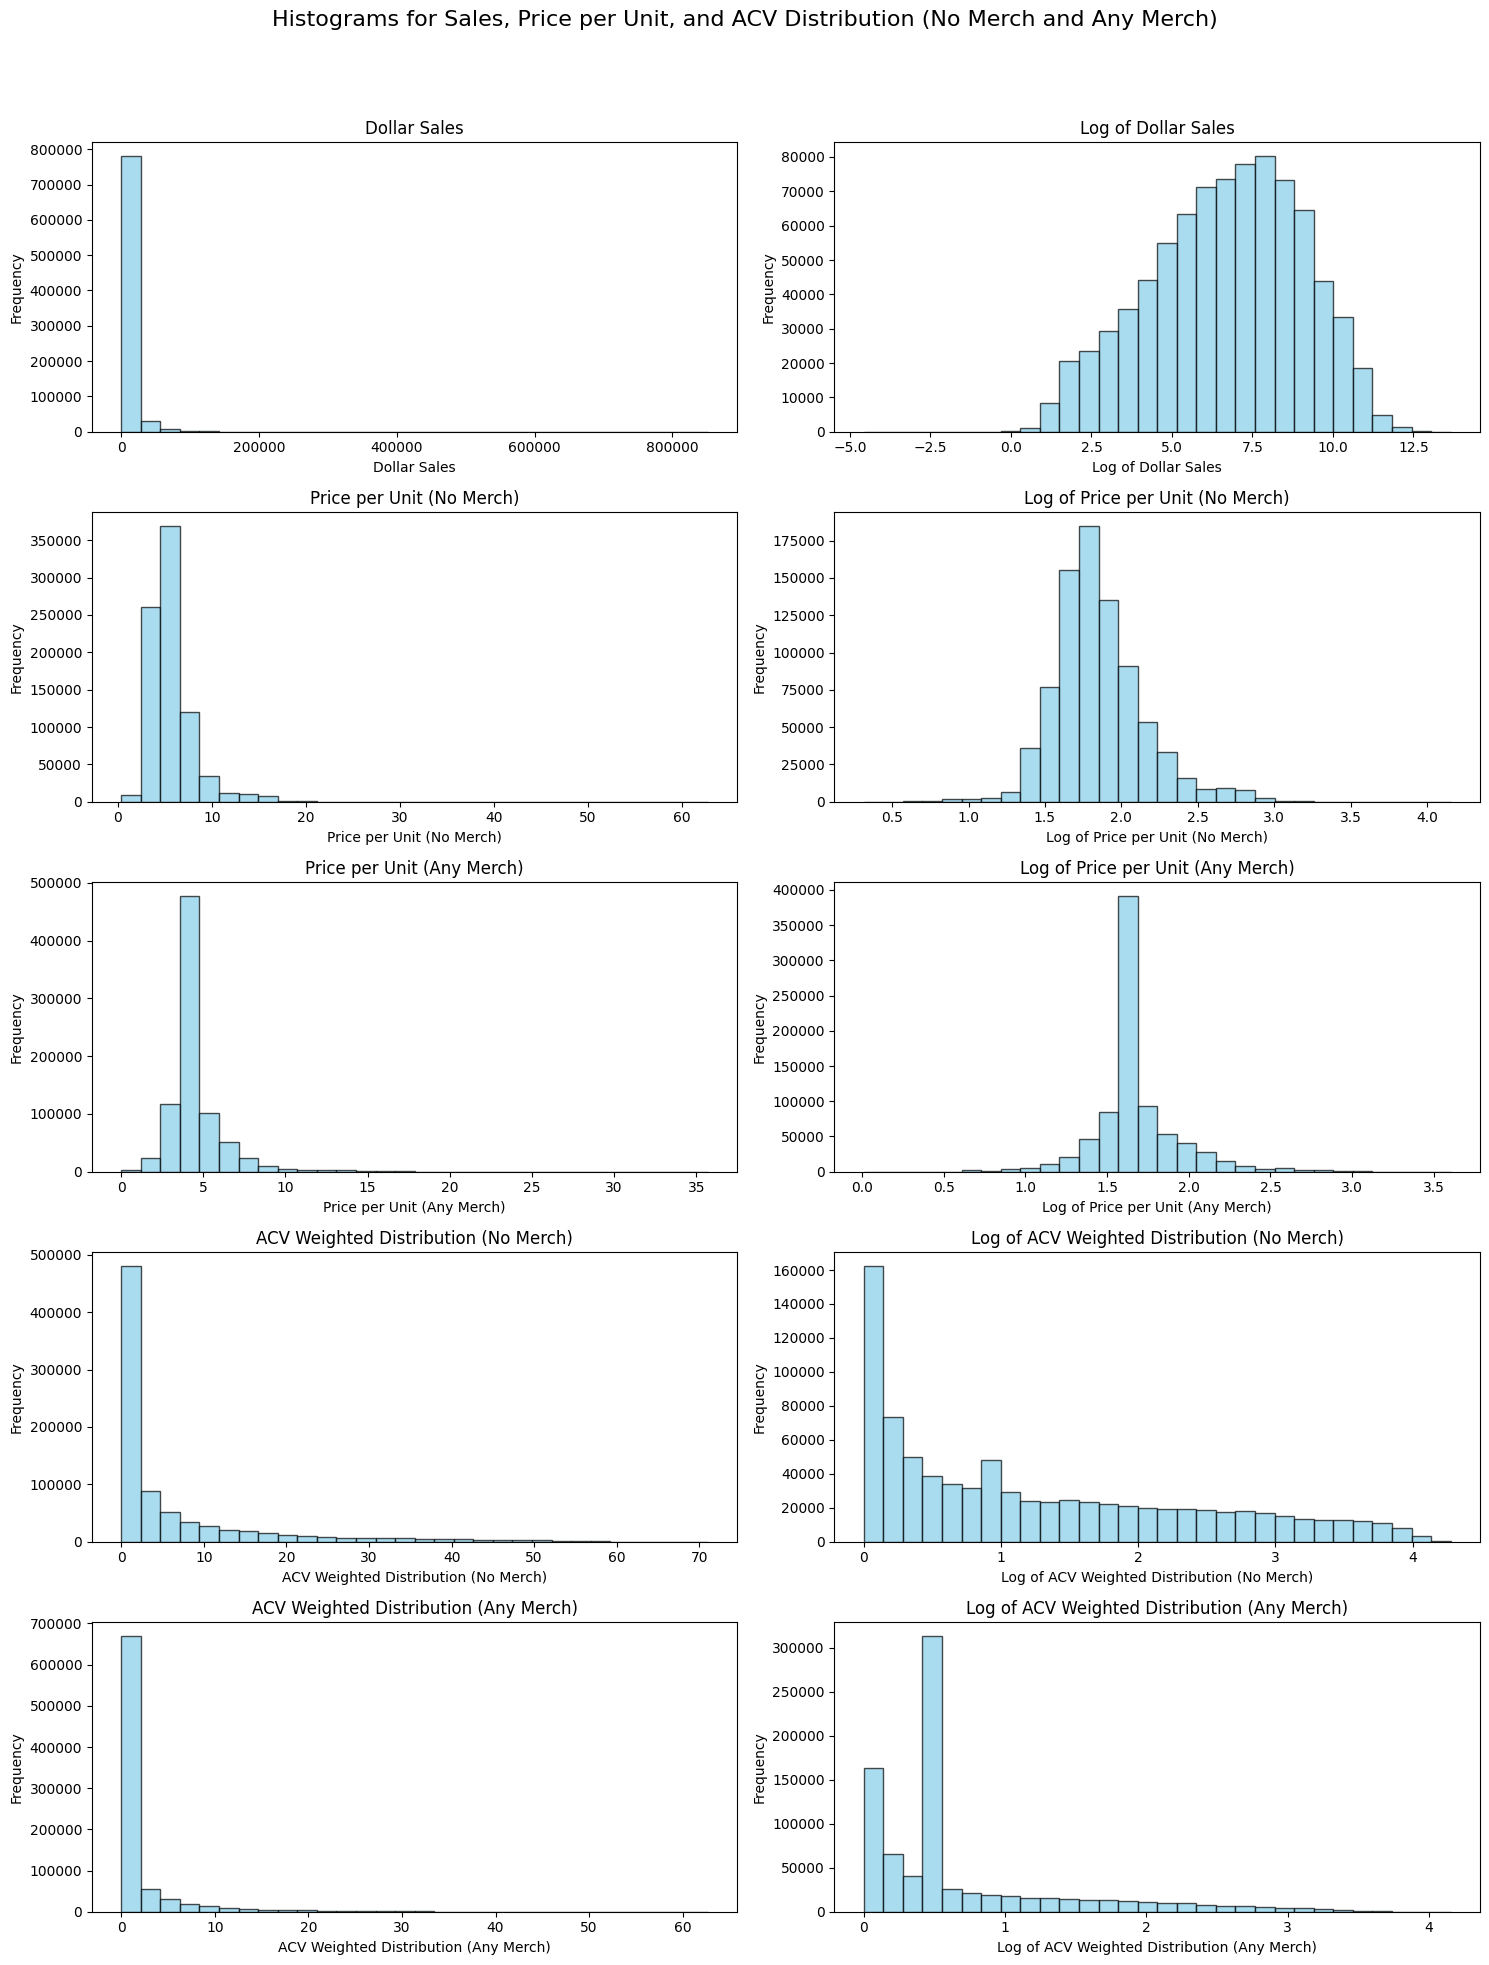

In [ ]:


# Create new log-transformed columns
meat_substitute_with_attributes_cleaned['log_sales'] = np.log(meat_substitute_with_attributes_cleaned['Dollar_Sales'])
meat_substitute_with_attributes_cleaned['log_price_per_unit_no_merch'] = np.log(meat_substitute_with_attributes_cleaned['Price_per_Unit_No_Merch'] + 1)
meat_substitute_with_attributes_cleaned['log_price_per_unit_any_merch'] = np.log(meat_substitute_with_attributes_cleaned['Price_per_Unit_Any_Merch'] + 1)
meat_substitute_with_attributes_cleaned['log_acv_distribution_no_merch'] = np.log(meat_substitute_with_attributes_cleaned['ACV_Weighted_Distribution_No_Merch'] + 1)
meat_substitute_with_attributes_cleaned['log_acv_distribution_any_merch'] = np.log(meat_substitute_with_attributes_cleaned['ACV_Weighted_Distribution_Any_Merch'] + 1)

# Define variables for the histograms
variables = [
    ('Dollar_Sales', 'Dollar Sales'),
    ('log_sales', 'Log of Dollar Sales'),
    ('Price_per_Unit_No_Merch', 'Price per Unit (No Merch)'),
    ('log_price_per_unit_no_merch', 'Log of Price per Unit (No Merch)'),
    ('Price_per_Unit_Any_Merch', 'Price per Unit (Any Merch)'),
    ('log_price_per_unit_any_merch', 'Log of Price per Unit (Any Merch)'),
    ('ACV_Weighted_Distribution_No_Merch', 'ACV Weighted Distribution (No Merch)'),
    ('log_acv_distribution_no_merch', 'Log of ACV Weighted Distribution (No Merch)'),
    ('ACV_Weighted_Distribution_Any_Merch', 'ACV Weighted Distribution (Any Merch)'),
    ('log_acv_distribution_any_merch', 'Log of ACV Weighted Distribution (Any Merch)')
]

# Set up the 5x2 layout for 10 histograms
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Histograms for Sales, Price per Unit, and ACV Distribution (No Merch and Any Merch)', fontsize=16)

# Plot histograms
for ax, (column, title) in zip(axes.flatten(), variables):
    ax.hist(meat_substitute_with_attributes_cleaned[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(title)
    ax.set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()


In [ ]:
meat_substitute_with_attributes_cleaned.columns

Index(['Geography', 'Time', 'UPC_13_digit', 'Dollar_Sales',
       'Dollar_Sales_No_Merch', 'Dollar_Sales_Any_Merch', 'Price_per_Unit',
       'Price_per_Unit_No_Merch', 'Price_per_Unit_Any_Merch',
       'Price_per_Volume', 'ACV_Weighted_Distribution',
       'ACV_Weighted_Distribution_No_Merch',
       'ACV_Weighted_Distribution_Any_Merch', 'Product_y',
       'Brand_Franchise_Name', 'Package', 'Total_Count', 'Total_Ounces',
       'Form', 'Flavor', 'Type_Of_Meat_Substituted', 'Type_Of_Substitute',
       'Cooked_Info', 'Season', 'Year', 'IsGardein', 'Merch_Indicator',
       'Population', 'Normalized_Sales', 'log_sales',
       'log_price_per_unit_no_merch', 'log_price_per_unit_any_merch',
       'log_acv_distribution_no_merch', 'log_acv_distribution_any_merch'],
      dtype='object')

In [ ]:
# Filter the existing dataset for the specified Brand Franchise Names
brands_to_filter = [
    "MORNINGSTAR FARMS", "BEYOND MEAT", "GARDEIN",
    "IMPOSSIBLE", "LIGHTLIFE", "PRIVATE LABEL",
    "TOFURKY", "FIELD ROAST", "BOCA", "QUORN",
    "DR PRAEGERS"
]

meat_substitute_with_attributes_cleaned = meat_substitute_with_attributes_cleaned[
    meat_substitute_with_attributes_cleaned['Brand_Franchise_Name'].isin(brands_to_filter)
]

### Run Ridge Regression on All Brands

<ipython-input-206-117040656856>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_substitute_with_attributes_cleaned['Time'] = pd.to_datetime(meat_substitute_with_attributes_cleaned['Time'])
<ipython-input-206-117040656856>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_substitute_with_attributes_cleaned['Season'] = meat_substitute_with_attributes_cleaned['Time'].dt.month.apply(get_season)


Using the following features:
['log_acv_distribution_no_merch', 'Total_Ounces', 'IsGardein', 'Geography_Great Lakes', 'Geography_Mid-South', 'Geography_Northeast', 'Geography_Plains', 'Geography_South Central', 'Geography_Southeast', 'Geography_West', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Type_Of_Meat_Substituted_Poultry', 'Type_Of_Meat_Substituted_Seafood', 'Type_Of_Substitute_Pea Protien based', 'Type_Of_Substitute_Soy based', 'Type_Of_Substitute_Vegetable based', 'Cooked_Info_Partially Cooked', 'Cooked_Info_Ready To Cook']

Feature Coefficients and Interpretations:
log_acv_distribution_no_merch: 601.55% change in Dollar Sales for a 1-unit increase in the feature.
Total_Ounces: 30.36% change in Dollar Sales for a 1-unit increase in the feature.
IsGardein: -2.89% change in Dollar Sales for a 1-unit increase in the feature.
Geography_Great Lakes: 3.34% difference in Dollar Sales compared to the reference category.
Geography_Mid-South: 6.04% difference in Dollar Sales comp

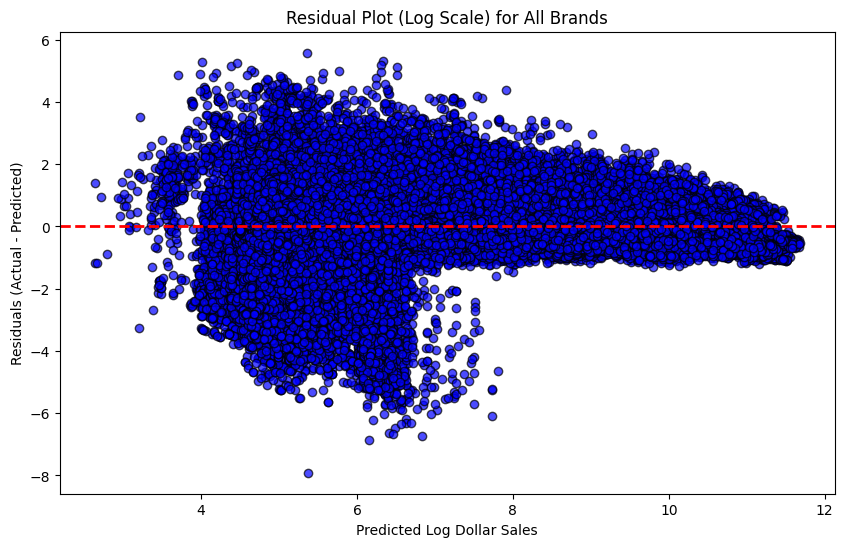

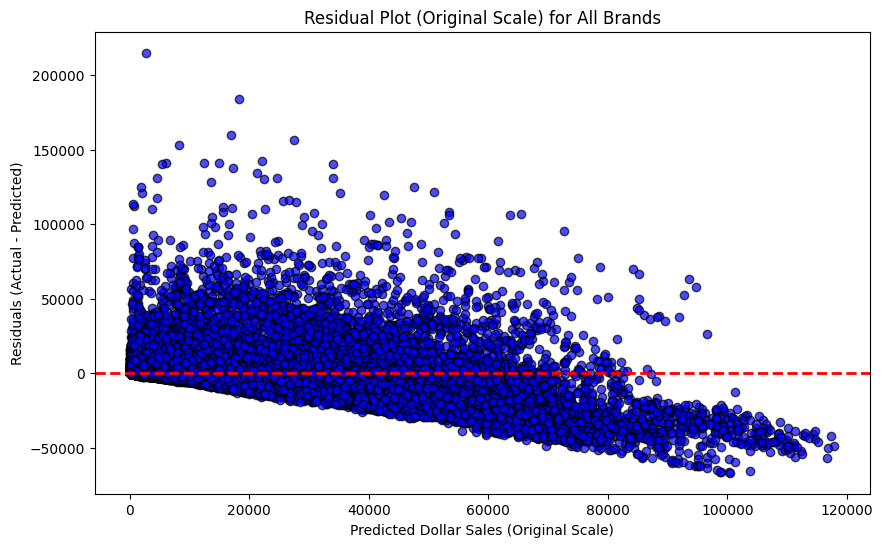

In [ ]:
# Ensure 'Time' column is in datetime format
meat_substitute_with_attributes_cleaned['Time'] = pd.to_datetime(meat_substitute_with_attributes_cleaned['Time'])

# Create 'Season' column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

meat_substitute_with_attributes_cleaned['Season'] = meat_substitute_with_attributes_cleaned['Time'].dt.month.apply(get_season)

# Define categorical columns
categorical_columns = ['Geography', 'Season', 'Type_Of_Meat_Substituted', 'Type_Of_Substitute', 'Cooked_Info', 'Form', 'Flavor', 'Package']

# One-hot encode all categorical columns
meat_substitute_encoded = pd.get_dummies(meat_substitute_with_attributes_cleaned, columns=categorical_columns, drop_first=True)

# Create log of Dollar Sales as target variable
meat_substitute_encoded['log_dollar_sales'] = np.log(meat_substitute_encoded['Dollar_Sales'])

# Define the target variable
target = 'log_dollar_sales'

# Dynamically identify categorical variables (one-hot encoded columns)
categorical_features = [
    col for col in meat_substitute_encoded.columns
    if col.startswith('Geography_') or col.startswith('Season_') or
       col.startswith('Type_Of_Meat_Substituted_') or col.startswith('Type_Of_Substitute_') or
       col.startswith('Cooked_Info_')
]

# Explicitly specify numerical features to include
included_features = [
    'log_acv_distribution_no_merch',
    'Total_Ounces',
    'IsGardein'
]

# Combine specified numerical features with dynamically identified categorical features
final_features = included_features + categorical_features
print(f"Using the following features:\n{final_features}")

# Create feature matrix using the combined features
X = meat_substitute_encoded[final_features]
y = meat_substitute_encoded[target]

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set seed for reproducibility
seed = 42

# Split data into 80% training (earlier data) and 20% testing (latest data)
split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=seed)  # Seed ensures reproducibility
ridge_model.fit(X_train, y_train)

# Print coefficients with interpretations
coefficients = pd.Series(ridge_model.coef_, index=final_features)

# Interpretations
print("\nFeature Coefficients and Interpretations:")
for feature, coef in coefficients.items():
    percent_difference = (np.exp(coef) - 1) * 100  # Convert log difference to percent change
    if feature in included_features:
        print(f"{feature}: {percent_difference:.2f}% change in Dollar Sales for a 1-unit increase in the feature.")
    else:
        print(f"{feature}: {percent_difference:.2f}% difference in Dollar Sales compared to the reference category.")

# Evaluate the model
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"\nTraining RMSE (Log Scale): {rmse_train:.4f}")
print(f"Training R² (Log Scale): {r2_train:.4f}")
print(f"Test RMSE (Log Scale): {rmse_test:.4f}")
print(f"Test R² (Log Scale): {r2_test:.4f}")

# Back-transform predictions and actuals to the original scale
y_test_original = np.exp(y_test)
y_pred_test_original = np.exp(y_pred_test)
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))
r2_original = r2_score(y_test_original, y_pred_test_original)

print(f"\nTest RMSE (Original Scale): {rmse_original:.4f}")
print(f"Test R² (Original Scale): {r2_original:.4f}")

# Create residuals
residuals_log = y_test - y_pred_test
residuals_original = y_test_original - y_pred_test_original

# Create residual plot (Log Scale) for all brands
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_log, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Log Dollar Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Log Scale) for All Brands")
plt.show()

# Create residual plot (Original Scale) for all brands
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_original, residuals_original, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Dollar Sales (Original Scale)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Original Scale) for All Brands")
plt.show()


### Analyze the Variance Inflation Factor


In [ ]:


# Define columns to include for VIF calculation
vif_columns = [
    'Total_Count', 'Total_Ounces',
    'IsGardein',
    'log_acv_distribution_no_merch'
]

# Select the feature matrix
X_vif = meat_substitute_with_attributes_cleaned[vif_columns].copy()

# Step 1: Ensure all columns are numeric
X_vif = X_vif.apply(pd.to_numeric, errors='coerce')

# Step 2: Drop columns with zero variance
zero_variance_columns = X_vif.columns[X_vif.nunique() <= 1]
if len(zero_variance_columns) > 0:
    print("Dropping zero variance columns:", zero_variance_columns.tolist())
    X_vif = X_vif.drop(columns=zero_variance_columns)

# Step 3: Check for perfect multicollinearity
correlation_matrix = X_vif.corr()
print("Correlation matrix (check for perfect multicollinearity):")
print(correlation_matrix)

# Step 4: Drop any remaining NaN or Inf values just in case
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()  # Drop rows with NaN or Inf

# Step 5: Verify data cleanliness
print("\nData ready for VIF calculation:")
print(X_vif.describe())

# Step 6: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF results
print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data.sort_values(by="VIF", ascending=False))


Dropping zero variance columns: ['Total_Count']
Correlation matrix (check for perfect multicollinearity):
                               Total_Ounces  IsGardein  \
Total_Ounces                        1.00000    0.07126   
IsGardein                           0.07126    1.00000   
log_acv_distribution_no_merch      -0.04454    0.09674   

                               log_acv_distribution_no_merch  
Total_Ounces                                        -0.04454  
IsGardein                                            0.09674  
log_acv_distribution_no_merch                        1.00000  

Data ready for VIF calculation:
       Total_Ounces    IsGardein  log_acv_distribution_no_merch
count  507293.00000 507293.00000                   507293.00000
mean       12.17370      0.12750                        1.55412
std         6.83219      0.33354                        1.21504
min         4.00000      0.00000                        0.00005
25%         8.00000      0.00000                        

### Run Ridge Regression on Gardein Only

<ipython-input-208-87d4ad084df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_substitute_with_attributes_cleaned['Time'] = pd.to_datetime(meat_substitute_with_attributes_cleaned['Time'])
<ipython-input-208-87d4ad084df7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_substitute_filtered['Season'] = meat_substitute_filtered['Time'].dt.month.apply(get_season)


Using the following features:
['log_acv_distribution_no_merch', 'Total_Ounces', 'IsGardein', 'Geography_Great Lakes', 'Geography_Mid-South', 'Geography_Northeast', 'Geography_Plains', 'Geography_South Central', 'Geography_Southeast', 'Geography_West', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Type_Of_Meat_Substituted_Poultry', 'Type_Of_Meat_Substituted_Seafood', 'Cooked_Info_Partially Cooked', 'Cooked_Info_Ready To Cook', 'Form_Crumbles & Nuggets', 'Form_Hot Dog', 'Form_Patty', 'Flavor_Spicy', 'Flavor_Sweet & Sour', 'Flavor_Umami', 'Package_Plastic']

Feature Coefficients and Interpretations:
log_acv_distribution_no_merch: 515.88% change in Dollar Sales for a 1-unit increase in the feature.
Total_Ounces: 32.08% change in Dollar Sales for a 1-unit increase in the feature.
IsGardein: 0.00% change in Dollar Sales for a 1-unit increase in the feature.
Geography_Great Lakes: 0.89% difference in Dollar Sales compared to the reference category.
Geography_Mid-South: 11.39% difference

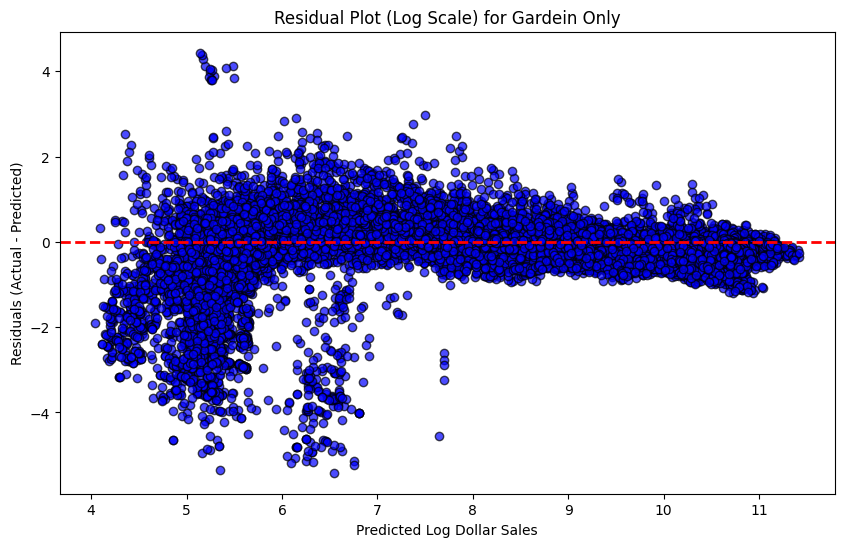

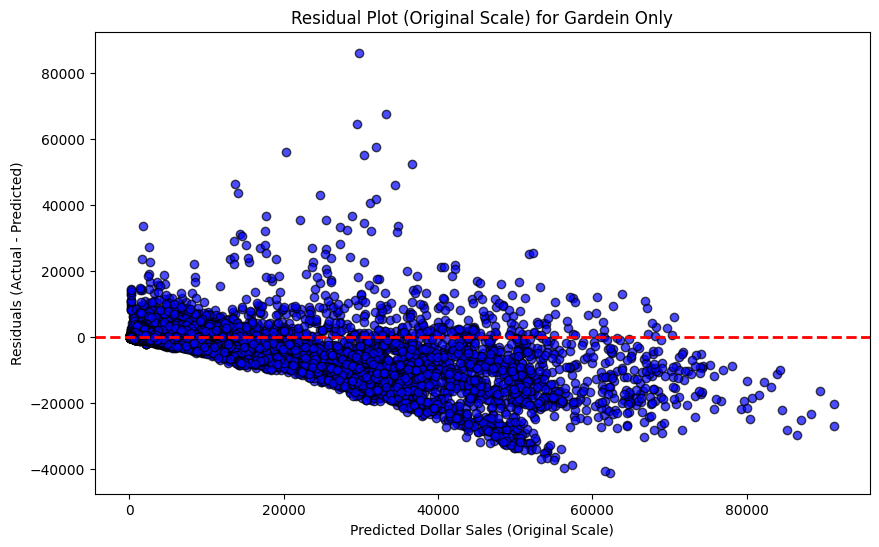

In [ ]:


# Ensure 'Time' column is in datetime format
meat_substitute_with_attributes_cleaned['Time'] = pd.to_datetime(meat_substitute_with_attributes_cleaned['Time'])

# Apply filter for IsGardein == 1
meat_substitute_filtered = meat_substitute_with_attributes_cleaned[meat_substitute_with_attributes_cleaned['IsGardein'] == 1]

# Create 'Season' column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

meat_substitute_filtered['Season'] = meat_substitute_filtered['Time'].dt.month.apply(get_season)

# Define categorical columns
categorical_columns = [
    'Geography', 'Season', 'Type_Of_Meat_Substituted',
    'Type_Of_Substitute', 'Cooked_Info', 'Form',
    'Flavor', 'Package'
]

# One-hot encode all categorical columns
meat_substitute_encoded = pd.get_dummies(meat_substitute_filtered, columns=categorical_columns, drop_first=True)

# Create log of Dollar Sales as target variable
meat_substitute_encoded['log_dollar_sales'] = np.log(meat_substitute_encoded['Dollar_Sales'])

# Define the target variable
target = 'log_dollar_sales'

# Dynamically identify categorical variables (one-hot encoded columns)
categorical_features = [
    col for col in meat_substitute_encoded.columns
    if col.startswith('Geography_') or col.startswith('Season_') or
       col.startswith('Type_Of_Meat_Substituted_') or col.startswith('Type_Of_Substitute_') or
       col.startswith('Cooked_Info_') or col.startswith('Package_') or col.startswith('Form_') or col.startswith('Flavor_')
]

# Explicitly specify numerical features to include
included_features = [
    'log_acv_distribution_no_merch',
    'Total_Ounces',
    'IsGardein'
]

# Combine specified numerical features with dynamically identified categorical features
final_features = included_features + categorical_features
print(f"Using the following features:\n{final_features}")

# Create feature matrix using the combined features
X = meat_substitute_encoded[final_features]
y = meat_substitute_encoded[target]

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into 80% training (earlier data) and 20% testing (latest data)
split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Print coefficients with interpretations
coefficients = pd.Series(ridge_model.coef_, index=final_features)

print("\nFeature Coefficients and Interpretations:")
for feature, coef in coefficients.items():
    percent_difference = (np.exp(coef) - 1) * 100  # Convert log difference to percent change
    if feature in included_features:
        print(f"{feature}: {percent_difference:.2f}% change in Dollar Sales for a 1-unit increase in the feature.")
    elif feature.startswith('Package_'):
        print(f"{feature}: {percent_difference:.2f}% difference in Dollar Sales compared to the reference package.")
    else:
        print(f"{feature}: {percent_difference:.2f}% difference in Dollar Sales compared to the reference category.")

# Evaluate the model
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"\nTraining RMSE (Log Scale): {rmse_train:.4f}")
print(f"Training R² (Log Scale): {r2_train:.4f}")
print(f"Test RMSE (Log Scale): {rmse_test:.4f}")
print(f"Test R² (Log Scale): {r2_test:.4f}")

# Back-transform predictions and actuals to the original scale
y_test_original = np.exp(y_test)
y_pred_test_original = np.exp(y_pred_test)
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))
r2_original = r2_score(y_test_original, y_pred_test_original)

print(f"\nTest RMSE (Original Scale): {rmse_original:.4f}")
print(f"Test R² (Original Scale): {r2_original:.4f}")

# Create residuals
residuals_log = y_test - y_pred_test
residuals_original = y_test_original - y_pred_test_original

# Create residual plot (Log Scale) for Gardein only
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_log, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Log Dollar Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Log Scale) for Gardein Only")
plt.show()

# Create residual plot (Original Scale) for Gardein only
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_original, residuals_original, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Dollar Sales (Original Scale)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Original Scale) for Gardein Only")
plt.show()



### Run Ridge Regression on All Brands Except Gardein

In [ ]:


# Ensure 'Time' column is in datetime format
meat_substitute_with_attributes_cleaned['Time'] = pd.to_datetime(meat_substitute_with_attributes_cleaned['Time'])

# Apply filter for IsGardein == 0
meat_substitute_filtered = meat_substitute_with_attributes_cleaned[meat_substitute_with_attributes_cleaned['IsGardein'] == 0]

# Create 'Season' column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

meat_substitute_filtered['Season'] = meat_substitute_filtered['Time'].dt.month.apply(get_season)

# Define categorical columns
categorical_columns = [
    'Geography', 'Season', 'Type_Of_Meat_Substituted',
    'Type_Of_Substitute', 'Cooked_Info', 'Form',
    'Flavor', 'Package'
]

# One-hot encode all categorical columns
meat_substitute_encoded = pd.get_dummies(meat_substitute_filtered, columns=categorical_columns, drop_first=True)

# Create log of Dollar Sales as target variable
meat_substitute_encoded['log_dollar_sales'] = np.log(meat_substitute_encoded['Dollar_Sales'])

# Define the target variable
target = 'log_dollar_sales'

# Dynamically identify categorical variables (one-hot encoded columns)
categorical_features = [
    col for col in meat_substitute_encoded.columns
    if col.startswith('Geography_') or col.startswith('Season_') or
       col.startswith('Type_Of_Meat_Substituted_') or col.startswith('Type_Of_Substitute_') or
       col.startswith('Cooked_Info_') or col.startswith('Package_') or col.startswith('Form_') or col.startswith('Flavor_')
]

# Explicitly specify numerical features to include
included_features = [
    'log_acv_distribution_no_merch',
    'Total_Ounces',
    'IsGardein'
]

# Combine specified numerical features with dynamically identified categorical features
final_features = included_features + categorical_features
print(f"Using the following features:\n{final_features}")

# Create feature matrix using the combined features
X = meat_substitute_encoded[final_features]
y = meat_substitute_encoded[target]

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into 80% training (earlier data) and 20% testing (latest data)
split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Print coefficients with interpretations
coefficients = pd.Series(ridge_model.coef_, index=final_features)

print("\nFeature Coefficients and Interpretations:")
for feature, coef in coefficients.items():
    percent_difference = (np.exp(coef) - 1) * 100  # Convert log difference to percent change
    if feature in included_features:
        print(f"{feature}: {percent_difference:.2f}% change in Dollar Sales for a 1-unit increase in the feature.")
    elif feature.startswith('Package_'):
        print(f"{feature}: {percent_difference:.2f}% difference in Dollar Sales compared to the reference package.")
    else:
        print(f"{feature}: {percent_difference:.2f}% difference in Dollar Sales compared to the reference category.")

# Evaluate the model
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"\nTraining RMSE (Log Scale): {rmse_train:.4f}")
print(f"Training R² (Log Scale): {r2_train:.4f}")
print(f"Test RMSE (Log Scale): {rmse_test:.4f}")
print(f"Test R² (Log Scale): {r2_test:.4f}")

# Back-transform predictions and actuals to the original scale
y_test_original = np.exp(y_test)
y_pred_test_original = np.exp(y_pred_test)
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))
r2_original = r2_score(y_test_original, y_pred_test_original)

print(f"\nTest RMSE (Original Scale): {rmse_original:.4f}")
print(f"Test R² (Original Scale): {r2_original:.4f}")

# Create residuals
residuals_log = y_test - y_pred_test
residuals_original = y_test_original - y_pred_test_original

# Create residual plot (Log Scale) for All Other Brands
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_log, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Log Dollar Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Log Scale) for All Other Brands")
plt.show()

# Create residual plot (Original Scale) for All Other Brands
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_original, residuals_original, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Dollar Sales (Original Scale)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Original Scale) for All Other Brands")
plt.show()



### Seasonality Analysis ANOVA


In [ ]:


# Clean column names by replacing spaces and special characters
cleaned_df = meat_substitute_with_attributes_cleaned.rename(columns=lambda x: x.replace(" ", "_").replace("/", "_"))

# Columns to test (with cleaned names)
columns_to_test = [
    'Dollar_Sales_No_Merch',
    'Dollar_Sales_Any_Merch',
    'Price_per_Unit_No_Merch',
    'Price_per_Unit_Any_Merch',
    'ACV_Weighted_Distribution_No_Merch',
    'ACV_Weighted_Distribution_Any_Merch'
]

# Initialize dictionaries to store formatted ANOVA results for Gardein and other brands
anova_results_gardein = {}
anova_results_other_brands = {}

# Perform ANOVA for each column for Gardein Sales (IsGardein = 0)
gardein_df = cleaned_df[cleaned_df['IsGardein'] == 0]

for column in columns_to_test:
    if column in gardein_df.columns and 'Season' in gardein_df.columns:
        # Fit the ANOVA model
        formula = f'{column} ~ C(Season)'
        model = ols(formula, data=gardein_df).fit()
        anova_table = anova_lm(model)

        # Format the p-value as a float with three decimals
        if 'C(Season)' in anova_table.index:
            p_value = anova_table.loc['C(Season)', 'PR(>F)']
            anova_table.loc['C(Season)', 'PR(>F)'] = round(p_value, 3)

        # Store the formatted ANOVA table
        anova_results_gardein[column] = anova_table

# Perform ANOVA for each column for Other Brands (IsGardein = 1)
other_brands_df = cleaned_df[cleaned_df['IsGardein'] == 1]

for column in columns_to_test:
    if column in other_brands_df.columns and 'Season' in other_brands_df.columns:
        # Fit the ANOVA model
        formula = f'{column} ~ C(Season)'
        model = ols(formula, data=other_brands_df).fit()
        anova_table = anova_lm(model)

        # Format the p-value as a float with three decimals
        if 'C(Season)' in anova_table.index:
            p_value = anova_table.loc['C(Season)', 'PR(>F)']
            anova_table.loc['C(Season)', 'PR(>F)'] = round(p_value, 3)

        # Store the formatted ANOVA table
        anova_results_other_brands[column] = anova_table

# Display formatted ANOVA results for Gardein Sales
print("ANOVA Results for Gardein Sales (IsGardein = 0):\n")
for column, result in anova_results_gardein.items():
    print(f"\nANOVA results for {column}:\n")
    print(tabulate(result.reset_index(), headers='keys', tablefmt='pretty'))
    print("\n")

# Display formatted ANOVA results for Other Brands
print("ANOVA Results for Other Brands (IsGardein = 1):\n")
for column, result in anova_results_other_brands.items():
    print(f"\nANOVA results for {column}:\n")
    print(tabulate(result.reset_index(), headers='keys', tablefmt='pretty'))
    print("\n")


### Geography Analysis ANOVA


In [ ]:


# Clean column names by replacing spaces and special characters
cleaned_df = meat_substitute_with_attributes_cleaned.rename(columns=lambda x: x.replace(" ", "_").replace("/", "_"))

# Columns to test (with cleaned names)
columns_to_test = [
    'Dollar_Sales_No_Merch',
    'Dollar_Sales_Any_Merch',
    'Price_per_Unit_No_Merch',
    'Price_per_Unit_Any_Merch',
    'ACV_Weighted_Distribution_No_Merch',
    'ACV_Weighted_Distribution_Any_Merch'
]

# Initialize dictionaries to store formatted ANOVA results for Gardein and other brands
anova_results_gardein = {}
anova_results_other_brands = {}

# Perform ANOVA for each column for Gardein Sales (IsGardein = 0)
gardein_df = cleaned_df[cleaned_df['IsGardein'] == 0]

for column in columns_to_test:
    if column in gardein_df.columns and 'Geography' in gardein_df.columns:
        # Fit the ANOVA model
        formula = f'{column} ~ C(Geography)'
        model = ols(formula, data=gardein_df).fit()
        anova_table = anova_lm(model)

        # Format the p-value as a float with three decimals
        if 'C(Geography)' in anova_table.index:
            p_value = anova_table.loc['C(Geography)', 'PR(>F)']
            anova_table.loc['C(Geography)', 'PR(>F)'] = round(p_value, 3)

        # Store the formatted ANOVA table
        anova_results_gardein[column] = anova_table

# Perform ANOVA for each column for Other Brands (IsGardein = 1)
other_brands_df = cleaned_df[cleaned_df['IsGardein'] == 1]

for column in columns_to_test:
    if column in other_brands_df.columns and 'Geography' in other_brands_df.columns:
        # Fit the ANOVA model
        formula = f'{column} ~ C(Geography)'
        model = ols(formula, data=other_brands_df).fit()
        anova_table = anova_lm(model)

        # Format the p-value as a float with three decimals
        if 'C(Geography)' in anova_table.index:
            p_value = anova_table.loc['C(Geography)', 'PR(>F)']
            anova_table.loc['C(Geography)', 'PR(>F)'] = round(p_value, 3)

        # Store the formatted ANOVA table
        anova_results_other_brands[column] = anova_table

# Display formatted ANOVA results for Gardein Sales
print("ANOVA Results for Gardein Sales (IsGardein = 0) Based on Geography:\n")
for column, result in anova_results_gardein.items():
    print(f"\nANOVA results for {column}:\n")
    print(tabulate(result.reset_index(), headers='keys', tablefmt='pretty'))
    print("\n")

# Display formatted ANOVA results for Other Brands
print("ANOVA Results for Other Brands (IsGardein = 1) Based on Geography:\n")
for column, result in anova_results_other_brands.items():
    print(f"\nANOVA results for {column}:\n")
    print(tabulate(result.reset_index(), headers='keys', tablefmt='pretty'))
    print("\n")


In [ ]:
meat_substitute_with_attributes_cleaned.columns

In [ ]:
# Filter for GARDEIN brand and sum dollar sales across package categories
gardein_sales = meat_substitute_with_attributes[meat_substitute_with_attributes['Brand Franchise Name'] == 'GARDEIN']

# Sum of dollar sales by package category for GARDEIN
sales_by_package = gardein_sales.groupby('Flavor / Scent')['Dollar Sales'].sum()
print("Sales by Package Category for GARDEIN:")
print(sales_by_package)

# Total dollar sales for GARDEIN
total_dollar_sales = sales_by_package.sum()
print(f"\nTotal Dollar Sales for GARDEIN: ${total_dollar_sales:,.2f}")

In [ ]:
# Set Pandas to display floats in normal decimal notation
pd.set_option('display.float_format', lambda x: f"{x:.5f}")

def simplified_conjoint_analysis(data, group_label, alpha=0.05):
    # Base formula with main effects
    base_formula = """Normalized_Sales ~ Price_per_Unit + Total_Ounces
                      + C(Flavor) + C(Type_Of_Meat_Substituted)
                      + C(Type_Of_Substitute) + C(Cooked_Info)
                      + C(Season) + C(Geography) + C(Form) + C(Package)"""

    # Define interaction terms
    interaction_terms = [
        "C(Geography):C(Flavor)",
        "C(Cooked_Info):C(Type_Of_Substitute)",
        "C(Form):C(Flavor)",
        "C(Season):Price_per_Unit"
    ]

    # Fit the full model with interaction terms
    full_formula = base_formula + " + " + " + ".join(interaction_terms)
    full_model = smf.ols(formula=full_formula, data=data).fit()

    # Extract and format results
    results = full_model.summary2().tables[1].reset_index()
    results = results.rename(columns={
        'index': 'Parameter',
        'Coef.': 'Estimate',
        'Std.Err.': 'Std Error',
        'P>|t|': 'Pr >Chisq'
    })
    results['DF'] = 1
    results = results[['Parameter', 'DF', 'Estimate', 'Std Error', 'Pr >Chisq']]

    # Convert 'Pr >Chisq' to float and filter based on alpha
    results['Pr >Chisq'] = results['Pr >Chisq'].astype(float)
    significant_results = results[results['Pr >Chisq'] < alpha]

    print(f"\nSimplified Conjoint Analysis Results for {group_label} (p < {alpha}):")
    print(significant_results.to_string(index=False))
    return significant_results

# Perform conjoint analysis for IsGardein = 0
results_gardein_0 = simplified_conjoint_analysis(
    meat_substitute_with_attributes_cleaned[meat_substitute_with_attributes_cleaned['IsGardein'] == 0],
    "IsGardein = 0"
)

# Perform conjoint analysis for IsGardein = 1
results_gardein_1 = simplified_conjoint_analysis(
    meat_substitute_with_attributes_cleaned[meat_substitute_with_attributes_cleaned['IsGardein'] == 1],
    "IsGardein = 1"
)

# Determine which parameters are significant in either group
significant_params = pd.unique(
    pd.concat([results_gardein_0['Parameter'], results_gardein_1['Parameter']])
)

# Filter the comparison table to include only significant parameters
comparison = pd.merge(
    results_gardein_0[['Parameter', 'Estimate']],
    results_gardein_1[['Parameter', 'Estimate']],
    on='Parameter',
    suffixes=(" (IsGardein = 0)", " (IsGardein = 1)")
)

comparison_significant = comparison[comparison['Parameter'].isin(significant_params)]

print("\nComparison of Utilities (Significant Parameters Only):")
print(comparison_significant.to_string(index=False))



Simplified Conjoint Analysis Results for IsGardein = 0 (p < 0.05):
                                                                    Parameter  DF  Estimate  Std Error  Pr >Chisq
                                                                    Intercept   1   0.00009    0.00001    0.00000
                                                           C(Flavor)[T.Spicy]   1  -0.00005    0.00001    0.00000
                                                    C(Flavor)[T.Sweet & Sour]   1  -0.00011    0.00001    0.00000
                                                           C(Flavor)[T.Umami]   1  -0.00005    0.00001    0.00000
                                       C(Type_Of_Meat_Substituted)[T.Poultry]   1  -0.00002    0.00000    0.00000
                                       C(Type_Of_Meat_Substituted)[T.Seafood]   1  -0.00014    0.00001    0.00000
                                   C(Type_Of_Substitute)[T.Pea Protien based]   1  -0.00002    0.00001    0.01012
                    

In [ ]:
# Set Pandas to display floats in normal decimal notation
pd.set_option('display.float_format', lambda x: f"{x:.5f}")

def simplified_conjoint_analysis(data, group_label, alpha=0.05):
    # Base formula with main effects
    base_formula = """Normalized_Sales ~ Price_per_Unit + Total_Ounces
                      + C(Flavor) + C(Type_Of_Meat_Substituted)
                      + C(Type_Of_Substitute) + C(Cooked_Info)
                      + C(Season) + C(Geography) + C(Form) + C(Package)"""

    # Define interaction terms
    interaction_terms = [
        "C(Geography):C(Flavor)",
        "C(Cooked_Info):C(Type_Of_Substitute)",
        "C(Form):C(Flavor)",
        "C(Season):Price_per_Unit"
    ]

    # Fit the full model with interaction terms
    full_formula = base_formula + " + " + " + ".join(interaction_terms)
    full_model = smf.ols(formula=full_formula, data=data).fit()

    # Extract and format results
    results = full_model.summary2().tables[1].reset_index()
    results = results.rename(columns={
        'index': 'Parameter',
        'Coef.': 'Estimate',
        'Std.Err.': 'Std Error',
        'P>|t|': 'Pr >Chisq'
    })
    results['DF'] = 1
    results = results[['Parameter', 'DF', 'Estimate', 'Std Error', 'Pr >Chisq']]

    # Convert 'Pr >Chisq' to float and filter based on alpha
    results['Pr >Chisq'] = results['Pr >Chisq'].astype(float)
    significant_results = results[results['Pr >Chisq'] < alpha]

    print(f"\nSimplified Conjoint Analysis Results for {group_label} (p < {alpha}):")
    print(significant_results.to_string(index=False))
    return significant_results

# Perform conjoint analysis for IsGardein = 0
results_gardein_0 = simplified_conjoint_analysis(
    meat_substitute_with_attributes_cleaned[meat_substitute_with_attributes_cleaned['IsGardein'] == 0],
    "IsGardein = 0"
)

# Perform conjoint analysis for IsGardein = 1
results_gardein_1 = simplified_conjoint_analysis(
    meat_substitute_with_attributes_cleaned[meat_substitute_with_attributes_cleaned['IsGardein'] == 1],
    "IsGardein = 1"
)

# Determine which parameters are significant in either group
significant_params = pd.unique(
    pd.concat([results_gardein_0['Parameter'], results_gardein_1['Parameter']])
)

# Filter the comparison table to include only significant parameters
comparison = pd.merge(
    results_gardein_0[['Parameter', 'Estimate']],
    results_gardein_1[['Parameter', 'Estimate']],
    on='Parameter',
    suffixes=(" (IsGardein = 0)", " (IsGardein = 1)")
)

comparison_significant = comparison[comparison['Parameter'].isin(significant_params)]

print("\nComparison of Utilities (Significant Parameters Only):")
print(comparison_significant.to_string(index=False))


In [ ]:
meat_substitute_with_attributes_cleaned.columns

In [ ]:
# Ensure 'Time' column is in datetime format
meat_substitute_with_attributes_cleaned['Time'] = pd.to_datetime(meat_substitute_with_attributes_cleaned['Time'])

# Create 'Season' column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
# Filter the dataset to include only rows where 'IsGardein' equals 1
meat_substitute_with_attributes_cleaned = meat_substitute_with_attributes_cleaned[meat_substitute_with_attributes_cleaned['IsGardein'] == 1]

meat_substitute_with_attributes_cleaned['Season'] = meat_substitute_with_attributes_cleaned['Time'].dt.month.apply(get_season)

# Define categorical columns
categorical_columns = ['Geography', 'Season', 'Type_Of_Meat_Substituted', 'Type_Of_Substitute', 'Cooked_Info', 'Form', 'Flavor', 'Package']

# One-hot encode all categorical columns
meat_substitute_encoded = pd.get_dummies(meat_substitute_with_attributes_cleaned, columns=categorical_columns, drop_first=True)

# Create interaction terms between Form and Flavor
form_columns = [col for col in meat_substitute_encoded.columns if col.startswith('Form_')]
flavor_columns = [col for col in meat_substitute_encoded.columns if col.startswith('Flavor_')]

for form_col in form_columns:
    for flavor_col in flavor_columns:
        interaction_term = f'{form_col}_x_{flavor_col}'
        meat_substitute_encoded[interaction_term] = meat_substitute_encoded[form_col] * meat_substitute_encoded[flavor_col]

# Create interaction terms between Geography and Flavor
geography_columns = [col for col in meat_substitute_encoded.columns if col.startswith('Geography_')]

for geography_col in geography_columns:
    for flavor_col in flavor_columns:
        interaction_term = f'{geography_col}_x_{flavor_col}'
        meat_substitute_encoded[interaction_term] = meat_substitute_encoded[geography_col] * meat_substitute_encoded[flavor_col]

# Create log of Dollar Sales as target variable
meat_substitute_encoded['log_dollar_sales'] = np.log(meat_substitute_encoded['Dollar_Sales'])

# Define the target variable
target = 'log_dollar_sales'

# Dynamically identify categorical variables (one-hot encoded columns)
categorical_features = [
    col for col in meat_substitute_encoded.columns
    if col.startswith('Geography_') or col.startswith('Season_') or
       col.startswith('Type_Of_Meat_Substituted_') or col.startswith('Type_Of_Substitute_') or
       col.startswith('Cooked_Info_')
]

# Include interaction terms as features
interaction_features_form_flavor = [
    col for col in meat_substitute_encoded.columns if '_x_' in col and any(prefix in col for prefix in ['Form_', 'Flavor_'])
]

interaction_features_geography_flavor = [
    col for col in meat_substitute_encoded.columns if '_x_' in col and any(prefix in col for prefix in ['Geography_', 'Flavor_'])
]

# Explicitly specify numerical features to include
included_features = [
    'log_acv_distribution_no_merch',
    'Total_Ounces',
    'IsGardein'
]

# Combine specified numerical features with dynamically identified categorical features and interaction terms
final_features = included_features + categorical_features + interaction_features_form_flavor + interaction_features_geography_flavor
print(f"Using the following features:\n{final_features}")

# Create feature matrix using the combined features
X = meat_substitute_encoded[final_features]
y = meat_substitute_encoded[target]

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set seed for reproducibility
seed = 42

# Split data into 80% training (earlier data) and 20% testing (latest data)
split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=seed)  # Seed ensures reproducibility
ridge_model.fit(X_train, y_train)

# Print coefficients with interpretations
coefficients = pd.Series(ridge_model.coef_, index=final_features)

# Interpretations
print("\nFeature Coefficients and Interpretations:")
for feature, coef in coefficients.items():
    percent_difference = (np.exp(coef) - 1) * 100  # Convert log difference to percent change
    if feature in included_features:
        print(f"{feature}: {percent_difference:.2f}% change in Dollar Sales for a 1-unit increase in the feature.")
    else:
        print(f"{feature}: {percent_difference:.2f}% difference in Dollar Sales compared to the reference category.")

# Evaluate the model
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"\nTraining RMSE (Log Scale): {rmse_train:.4f}")
print(f"Training R² (Log Scale): {r2_train:.4f}")
print(f"Test RMSE (Log Scale): {rmse_test:.4f}")
print(f"Test R² (Log Scale): {r2_test:.4f}")

# Back-transform predictions and actuals to the original scale
y_test_original = np.exp(y_test)
y_pred_test_original = np.exp(y_pred_test)
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))
r2_original = r2_score(y_test_original, y_pred_test_original)

print(f"\nTest RMSE (Original Scale): {rmse_original:.4f}")
print(f"Test R² (Original Scale): {r2_original:.4f}")

# Create residuals
residuals_log = y_test - y_pred_test
residuals_original = y_test_original - y_pred_test_original

# Create residual plot (Log Scale) for all brands
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_log, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Log Dollar Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Log Scale) for All Brands")
plt.show()

# Create residual plot (Original Scale) for all brands
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_original, residuals_original, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Dollar Sales (Original Scale)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Original Scale) for All Brands")
plt.show()


In [ ]:
X